In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os

output_path = 'C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/'
redwood_path_prefix = "redwood_output/"
guiana_path_prefix = "guiana_output/"

In [4]:
# Define a function to convert a string representation of a list to a list
def parse_list_string(list_string):
    return [float(item.strip()) if '.' in item and item != '-' else int(item.strip()) if item != '-' else None for item in list_string.split('-')]

def read_tree_data(tree_file_path):
    tree_data = {}

    with open(tree_file_path, 'r') as file:
        tree_index = None
        tree_values = {}
        for line in file:
            line = line.strip()
            if line.endswith(':'):
                # Start of a new tree index
                if tree_index is not None:
                    tree_data[tree_index] = tree_values
                    tree_values = {}
                tree_index = line[:-1]
            elif line:
                # Parse field and value
                field, value = line.split(':')
                field = field.strip()
                value = value.strip()
                if value.startswith('- '):
                    # If the value is a list
                    value = parse_list_string(value[2:])
                elif '.' in value:
                    # If the value is a float
                    value = float(value)
                else:
                    # If the value is an integer or string
                    try:
                        value = int(value)
                    except ValueError:
                        pass
                tree_values[field] = value

        # Add the last tree data
        if tree_index is not None:
            tree_data[tree_index] = tree_values

        return tree_data

def parse_list_str(value):
    return [float(x.strip()) if '.' in x and any(c.isdigit() for c in x) else int(float(x.strip())) if x.strip().replace('.', '', 1).isdigit() else None for x in value.split('-')]

def read_circle_data(file_path):
    circle_data = {}
    current_circle_name = None
    current_field_name = None
    current_data = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check if the line is the start of a new circle
            if line.startswith("Circle ["):
                current_circle_name = line.rstrip(":")
                circle_data[current_circle_name] = {}
                current_data = circle_data[current_circle_name]
            elif line.endswith(":"):  # Field name line
                current_field_name = line[:-1]  # Extract field name
                current_data[current_field_name] = []
            elif line.startswith("-"):  # List item line
                if current_field_name:  # Ensure current_field_name is set
                    if current_field_name == "tree_indices":
                        current_data[current_field_name].append(int(line.split("-")[-1].strip()))
                    else:
                        current_data[current_field_name].append(float(line.split("-")[-1].strip()))
            elif ":" in line:  # Single value line
                field_name, field_value = map(str.strip, line.split(":", 1))
                current_data[field_name] = float(field_value)

    return circle_data

def output_circle_indices(circle_indices):
    for circle_name, data in circle_indices.items():
        print(f"{circle_name}:")
        for field, value in data.items():
            if isinstance(value, list):
                print(f"  {field}:")
                for v in value:
                    print(f"    - {v}")
            else:
                print(f"  {field}: {value}")

In [10]:
tree_file_path = output_path + redwood_path_prefix + 'tree_data.txt'

print (f'reading in {tree_file_path}')
redwood_tree_data = read_tree_data(tree_file_path)

tree_file_path = output_path + guiana_path_prefix + 'tree_data.txt'

print (f'reading in {tree_file_path}')
guiana_tree_data = read_tree_data(tree_file_path)

circle_file_path = output_path + redwood_path_prefix + 'circle_data.txt'

print (f'reading in {circle_file_path}')
redwood_circle_indices = read_circle_data(circle_file_path)

circle_file_path = output_path + guiana_path_prefix + 'circle_data.txt'

print (f'reading in {circle_file_path}')
guiana_circle_indices = read_circle_data(circle_file_path)

print(redwood_tree_data)
print(guiana_tree_data)
print(redwood_circle_indices)
print(guiana_circle_indices)

reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/redwood_output/tree_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/guiana_output/tree_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/redwood_output/circle_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/guiana_output/circle_data.txt
{'Tree [1]': {'crown_base': 6.53279, 'crown_d1': 4.75503, 'crown_d2': 2.70483, 'crown_d3': 9.46251, 'crown_center_height': 11.26404, 'tree_height': 16.01908, 'crown_base_height': 6.50901, 'crown_volume': 145.72089, 'single_leaf_area': 6e-05, 'total_leaf_area': 21.85813, 'total_tree_branch_area': 509.10734, 'total_tree_stem_area': 0, 'total_tree_ground_area': 71.03238, 'total_tree_canopy_veg_area': 530.96547}, 'Tree [2]': {'crown_base': 7.02676, 'crown_d1': 5.83397, 'crown_d2': 3.09267, 'crown_d3': 11.6096, 'crown_center_height': 12.83156, '

In [27]:
def plot_tree_densities(circle_indices, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Extract circle names and tree densities
    circle_names = list(circle_indices.keys())
    tree_densities = [circle_indices[circle_name]['tree_density'] for circle_name in circle_names]

    # Plotting the bar graph
    plt.figure(figsize=(20, 12))
    plt.bar(circle_names, tree_densities, color='skyblue')
    
    # Set the title based on the output filename
    if "redwood" in output_filename:
        plt.title('Tree Densities of All Circles in California Redwood 008')
    elif "guiana" in output_filename:
        plt.title('Tree Densities of All Circles in French Guiana 008')
    else:
        plt.title('Tree Densities of All Circles')
        
    plt.xlabel('Circle Names')
    plt.ylabel('Tree Density')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Customize plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 30
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

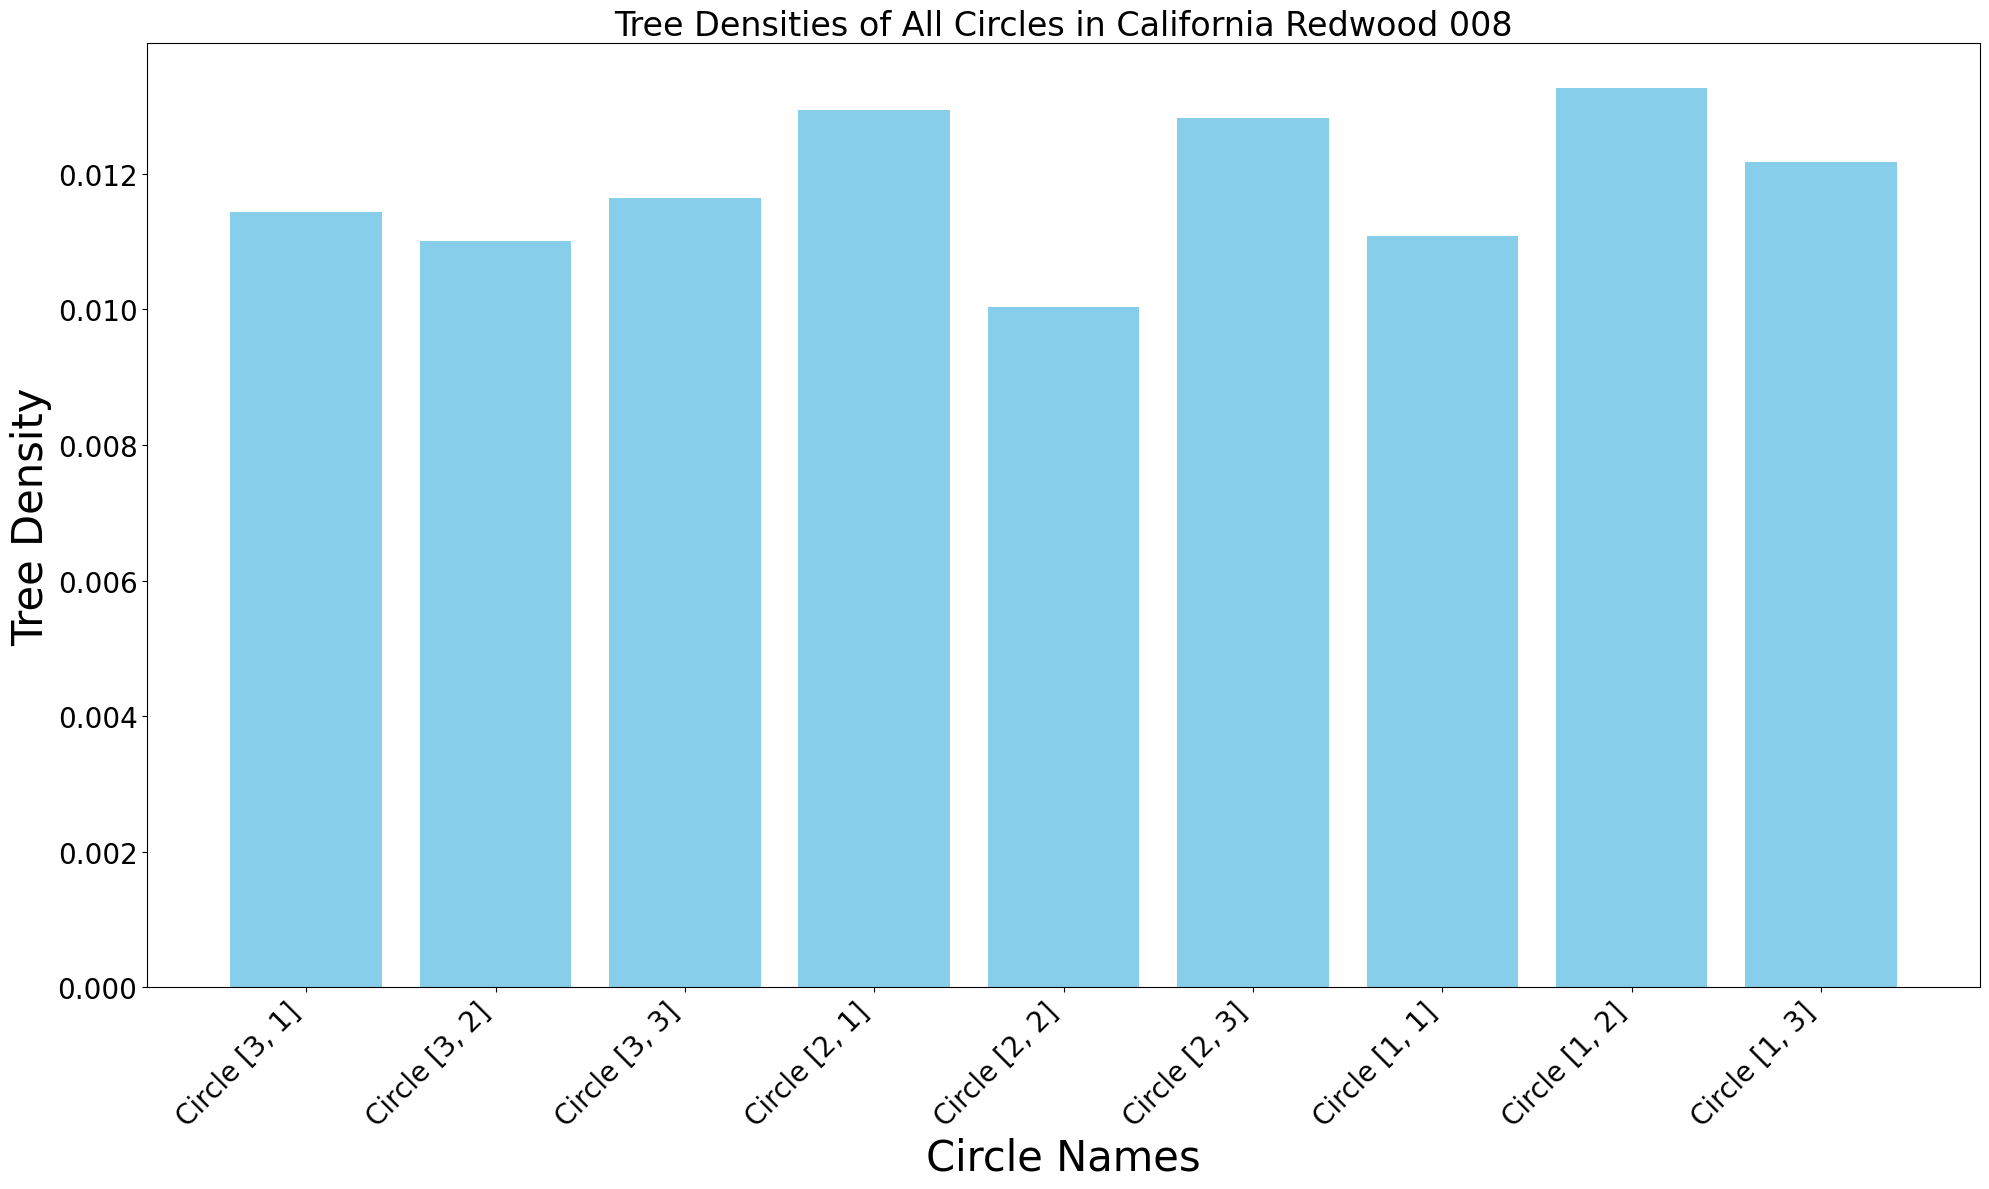

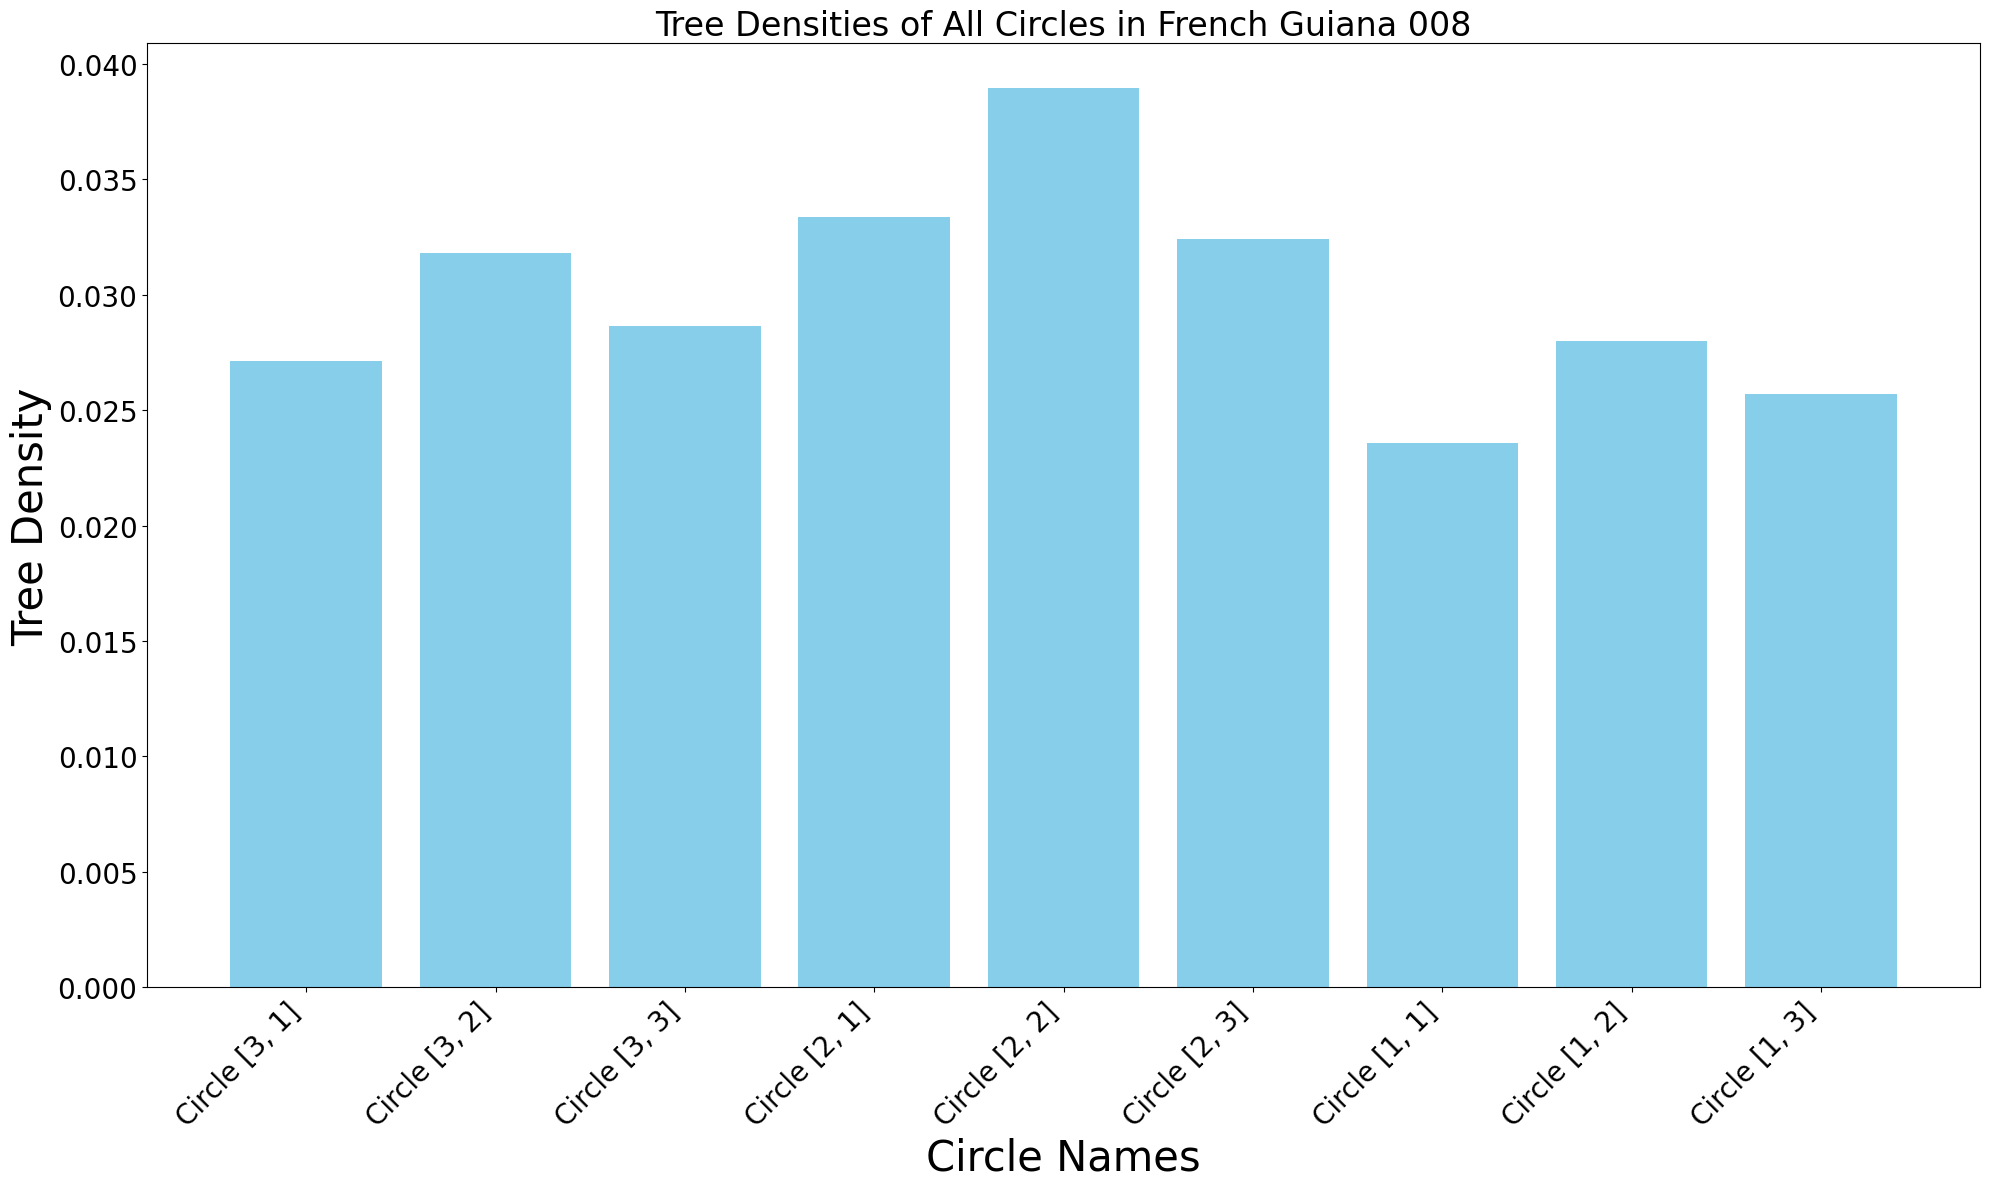

In [28]:
# Define the directory to save the figures
redwood_output_folder = "redwood_output/graphs_and_plots"
guiana_output_folder = "guiana_output/graphs_and_plots"
redwood_output_filename = "redwood_tree_densities.png"
guiana_output_filename = "guiana_tree_densities.png"

redwood_output_file_path = os.path.join(output_path, redwood_output_folder)
guiana_output_file_path = os.path.join(output_path, guiana_output_folder)

plot_tree_densities(redwood_circle_indices, redwood_output_file_path, redwood_output_filename)
plot_tree_densities(guiana_circle_indices, guiana_output_file_path, guiana_output_filename)

In [25]:
def plot_tree_metrics(tree_data, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Initialize lists for tree heights and crown diameters
    tree_heights = []
    crown_d1_values = []
    crown_d2_values = []

    # Extract tree_height, crown_d1, and crown_d2 values from tree_data
    for tree_values in tree_data.values():
        # Append tree_height, crown_d1, and crown_d2 values
        tree_heights.append(tree_values['tree_height'])
        crown_d1_values.append(tree_values['crown_d1'])
        crown_d2_values.append(tree_values['crown_d2'])

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(24, 12))

    # Plot crown_d2 vs tree_height
    axs[0].scatter(tree_heights, crown_d2_values, color='blue', alpha=0.5)
    axs[0].set_title('Crown Radius vs Tree Height')
    axs[0].set_xlabel('Tree Height')
    axs[0].set_ylabel('Crown Radius')
    axs[0].grid(True)

    # Plot crown_d1 vs tree_height
    axs[1].scatter(tree_heights, crown_d1_values, color='green', alpha=0.5)
    axs[1].set_title('Crown Depth vs Tree Height')
    axs[1].set_xlabel('Tree Height')
    axs[1].set_ylabel('Crown Depth')
    axs[1].grid(True)

    # Calculate crown_d2/h values
    crown_d2_over_h_values = [d2 / h for d2, h in zip(crown_d2_values, tree_heights)]

    # Plot crown_d2/h vs tree_height
    axs[2].scatter(tree_heights, crown_d2_over_h_values, color='red', alpha=0.5)
    axs[2].set_title('Crown Radius/Tree Height\n vs Tree Height')
    axs[2].set_xlabel('Tree Height')
    axs[2].set_ylabel('Crown Radius / Tree Height')
    axs[2].grid(True)

    # Set the suptitle and adjust layout
    if "redwood" in output_filename:
        plt.suptitle('California Redwood Tree Metrics', x=0.5, y=0.90, fontsize=36) 
    elif "guiana" in output_filename:
        plt.suptitle('French Guiana Tree Metrics', x=0.5, y=0.90, fontsize=36)
        
    plt.subplots_adjust(top=0.80, bottom=0.08, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

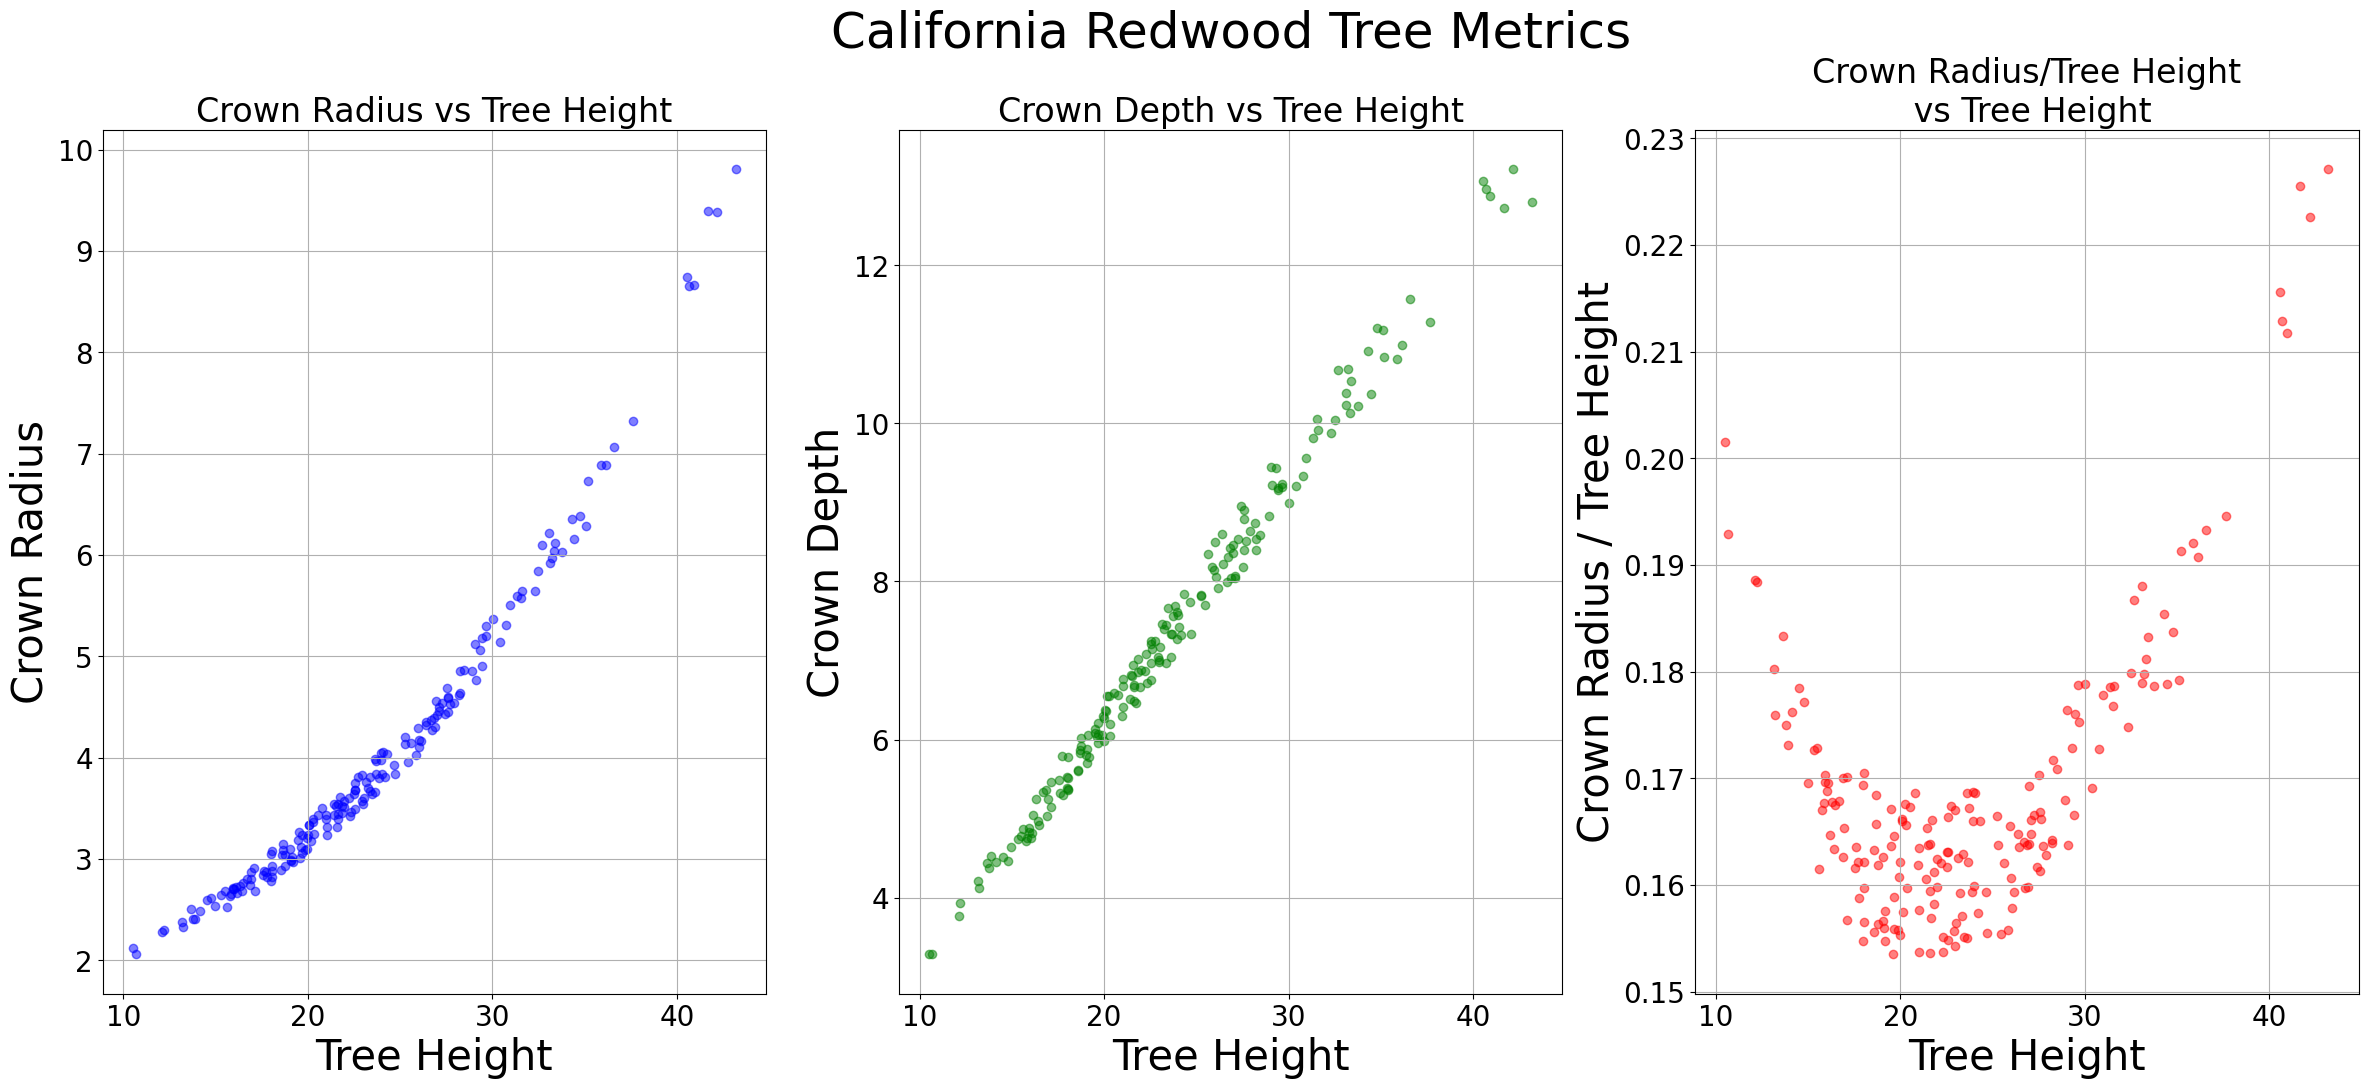

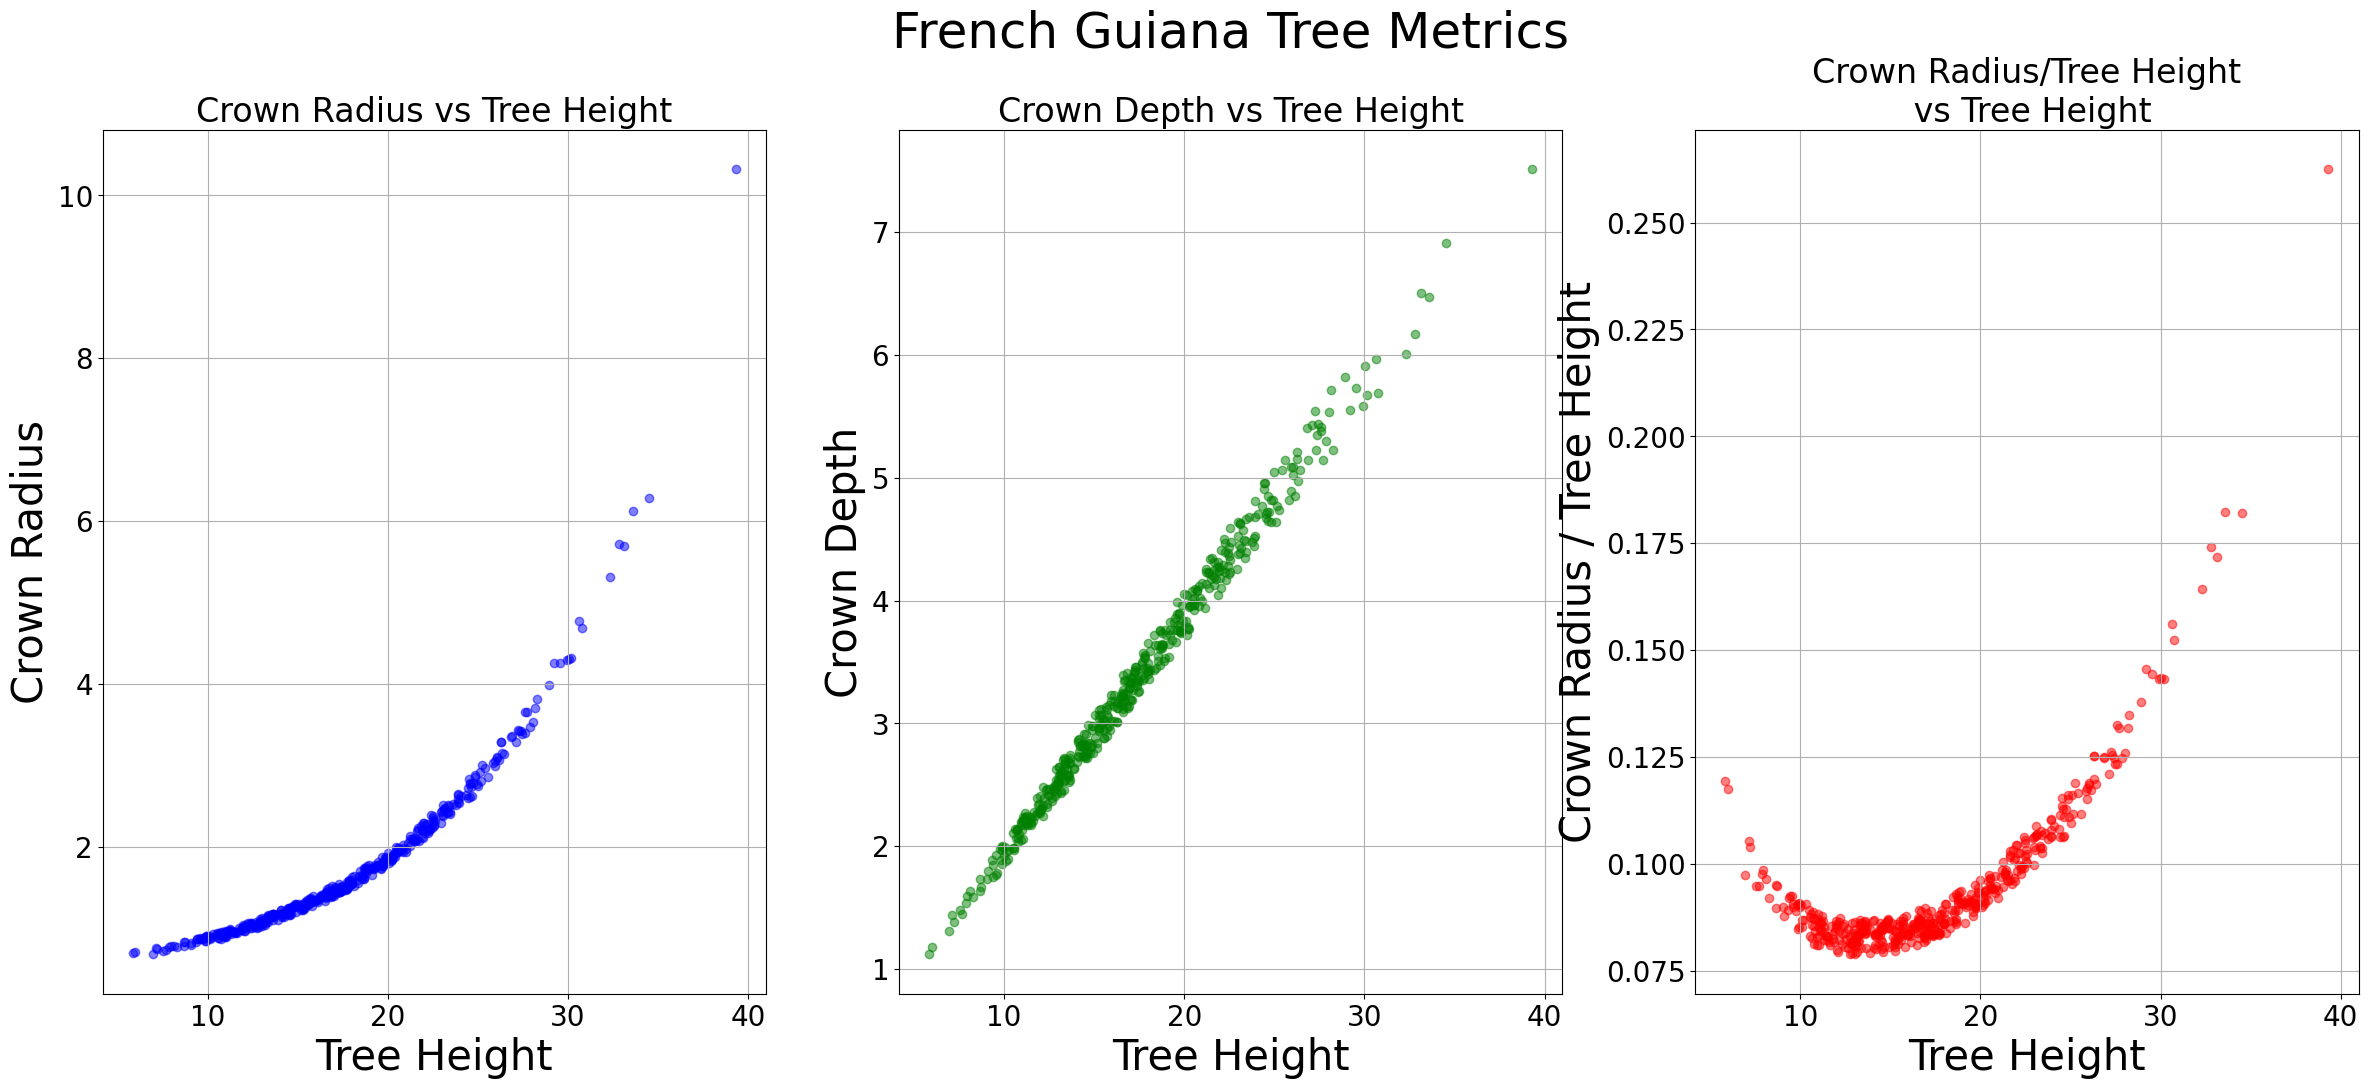

In [26]:
redwood_output_filename = "redwood_tree_metrics.png"
guiana_output_filename = "guiana_tree_metrics.png"

plot_tree_metrics(redwood_tree_data, redwood_output_file_path, redwood_output_filename)
plot_tree_metrics(guiana_tree_data, guiana_output_file_path, guiana_output_filename)

In [62]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 15

def plot_crown_radius_count(tree_data, circle_indices, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    # Iterate over each circle's data and plot the histogram
    for i, (circle_name, data) in enumerate(circle_indices.items()):
        # Extract tree indices for the current circle
        tree_indices = data['tree_indices']
        
        # Collect all crown_d2 values for the trees in the current circle
        all_crown_d2_values = []
        for tree_index in tree_indices:
            tree_data_key = f"Tree [{tree_index}]"
            crown_d2_value = tree_data[tree_data_key]['crown_d2']
            all_crown_d2_values.append(crown_d2_value)
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_crown_d2_values)
        x_max = max(all_crown_d2_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_crown_d2_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle_name)
        axs_flat[i].set_xlabel('Crown Radius')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Radius Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_tree_height_count(tree_data, circle_indices, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    # Iterate over each circle's data and plot the histogram
    for i, (circle_name, data) in enumerate(circle_indices.items()):
        # Extract tree indices for the current circle
        tree_indices = data['tree_indices']
        
        # Collect all tree height values for the trees in the current circle
        all_tree_height_values = []
        for tree_index in tree_indices:
            tree_data_key = f"Tree [{tree_index}]"
            tree_height_value = tree_data[tree_data_key]['tree_height']
            all_tree_height_values.append(tree_height_value)
        
        # Plot histogram for all tree height values in the current circle
        x_min = min(all_tree_height_values)
        x_max = max(all_tree_height_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_tree_height_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle_name)
        axs_flat[i].set_xlabel('Tree Height')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Tree Height Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_width_tree_height_ratio_count(tree_data, circle_indices, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    # Iterate over each circle's data and plot the histogram
    for i, (circle_name, data) in enumerate(circle_indices.items()):
        # Extract tree indices for the current circle
        tree_indices = data['tree_indices']
        
        # Collect all crown_d2 values for the trees in the current circle
        all_ratio_values = []
        for tree_index in tree_indices:
            tree_data_key = f"Tree [{tree_index}]"
            crown_d2 = tree_data[tree_data_key]['crown_d2']
            tree_height_value = tree_data[tree_data_key]['tree_height']
            ratio_value = 2 * crown_d2 / tree_height_value
            all_ratio_values.append(ratio_value)
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_ratio_values)
        x_max = max(all_ratio_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_ratio_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle_name)
        axs_flat[i].set_xlabel('Crown Width to Tree Height Ratio')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Width to Tree Height Ratio Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_tree_height_ratio_count(tree_data, circle_indices, output_folder, output_filename, plot_title):
    # Initialize list to store crown_d1/tree_height ratios
    crown_d1_tree_height_ratios = []

    # Iterate over each tree's data
    for tree_data_key, data in tree_data.items():
        crown_d1 = data.get('crown_d1')
        tree_height = data.get('tree_height')

        crown_d1_tree_height_ratio = crown_d1 / tree_height
        crown_d1_tree_height_ratios.append(crown_d1_tree_height_ratio)

    # Plot histogram
    plt.figure(figsize=(20, 20))
    x_min = min(crown_d1_tree_height_ratios)
    x_max = max(crown_d1_tree_height_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_tree_height_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Tree Height Ratio Count')
    plt.xlabel('Crown Depth / Tree Height')
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_crown_width_ratio_count(tree_data, circle_indices, output_folder, output_filename, plot_title):
    # Initialize list to store crown_d1/tree_height ratios
    crown_d1_crown_width_ratios = []

    # Iterate over each tree's data
    for tree_data_key, data in tree_data.items():
        crown_d1 = data.get('crown_d1')
        crown_d2 = data.get('crown_d2')

        crown_d1_crown_width_ratio = crown_d1 / (2 * crown_d2)
        crown_d1_crown_width_ratios.append(crown_d1_crown_width_ratio)

    # Plot histogram
    plt.figure(figsize=(18, 12))
    x_min = min(crown_d1_crown_width_ratios)
    x_max = max(crown_d1_crown_width_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_crown_width_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Crown Width Ratio Count')
    plt.xlabel('Crown Depth / Crown Width')
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

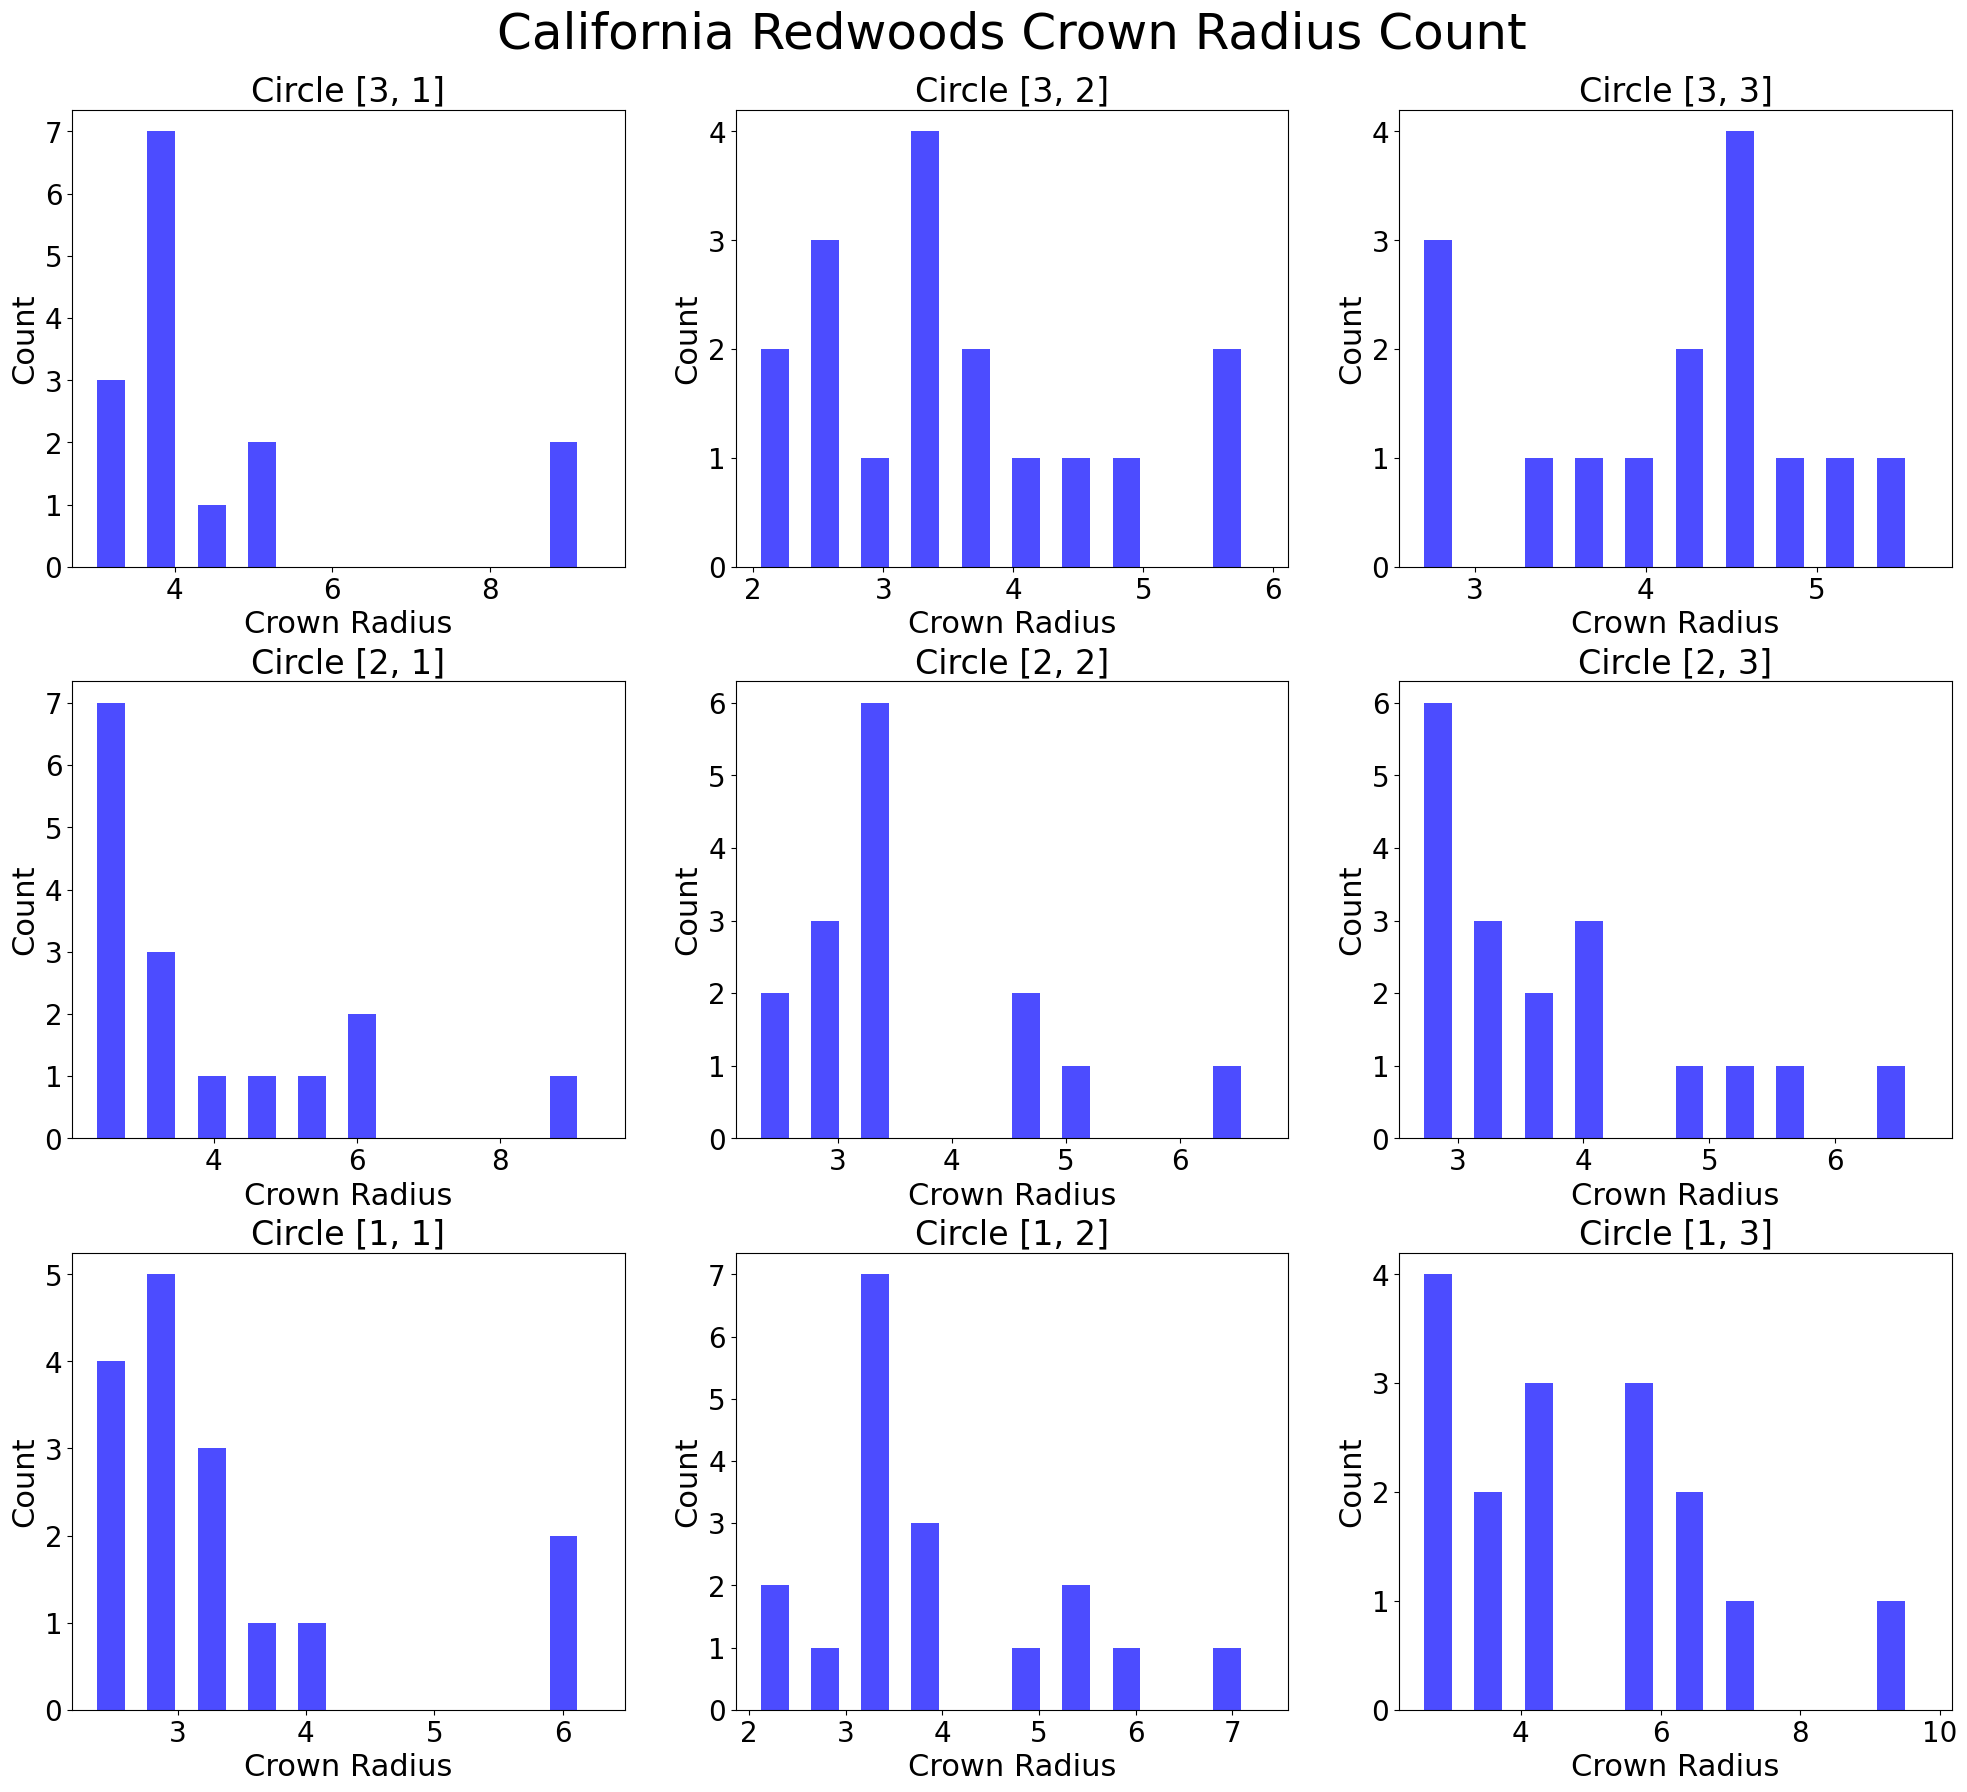

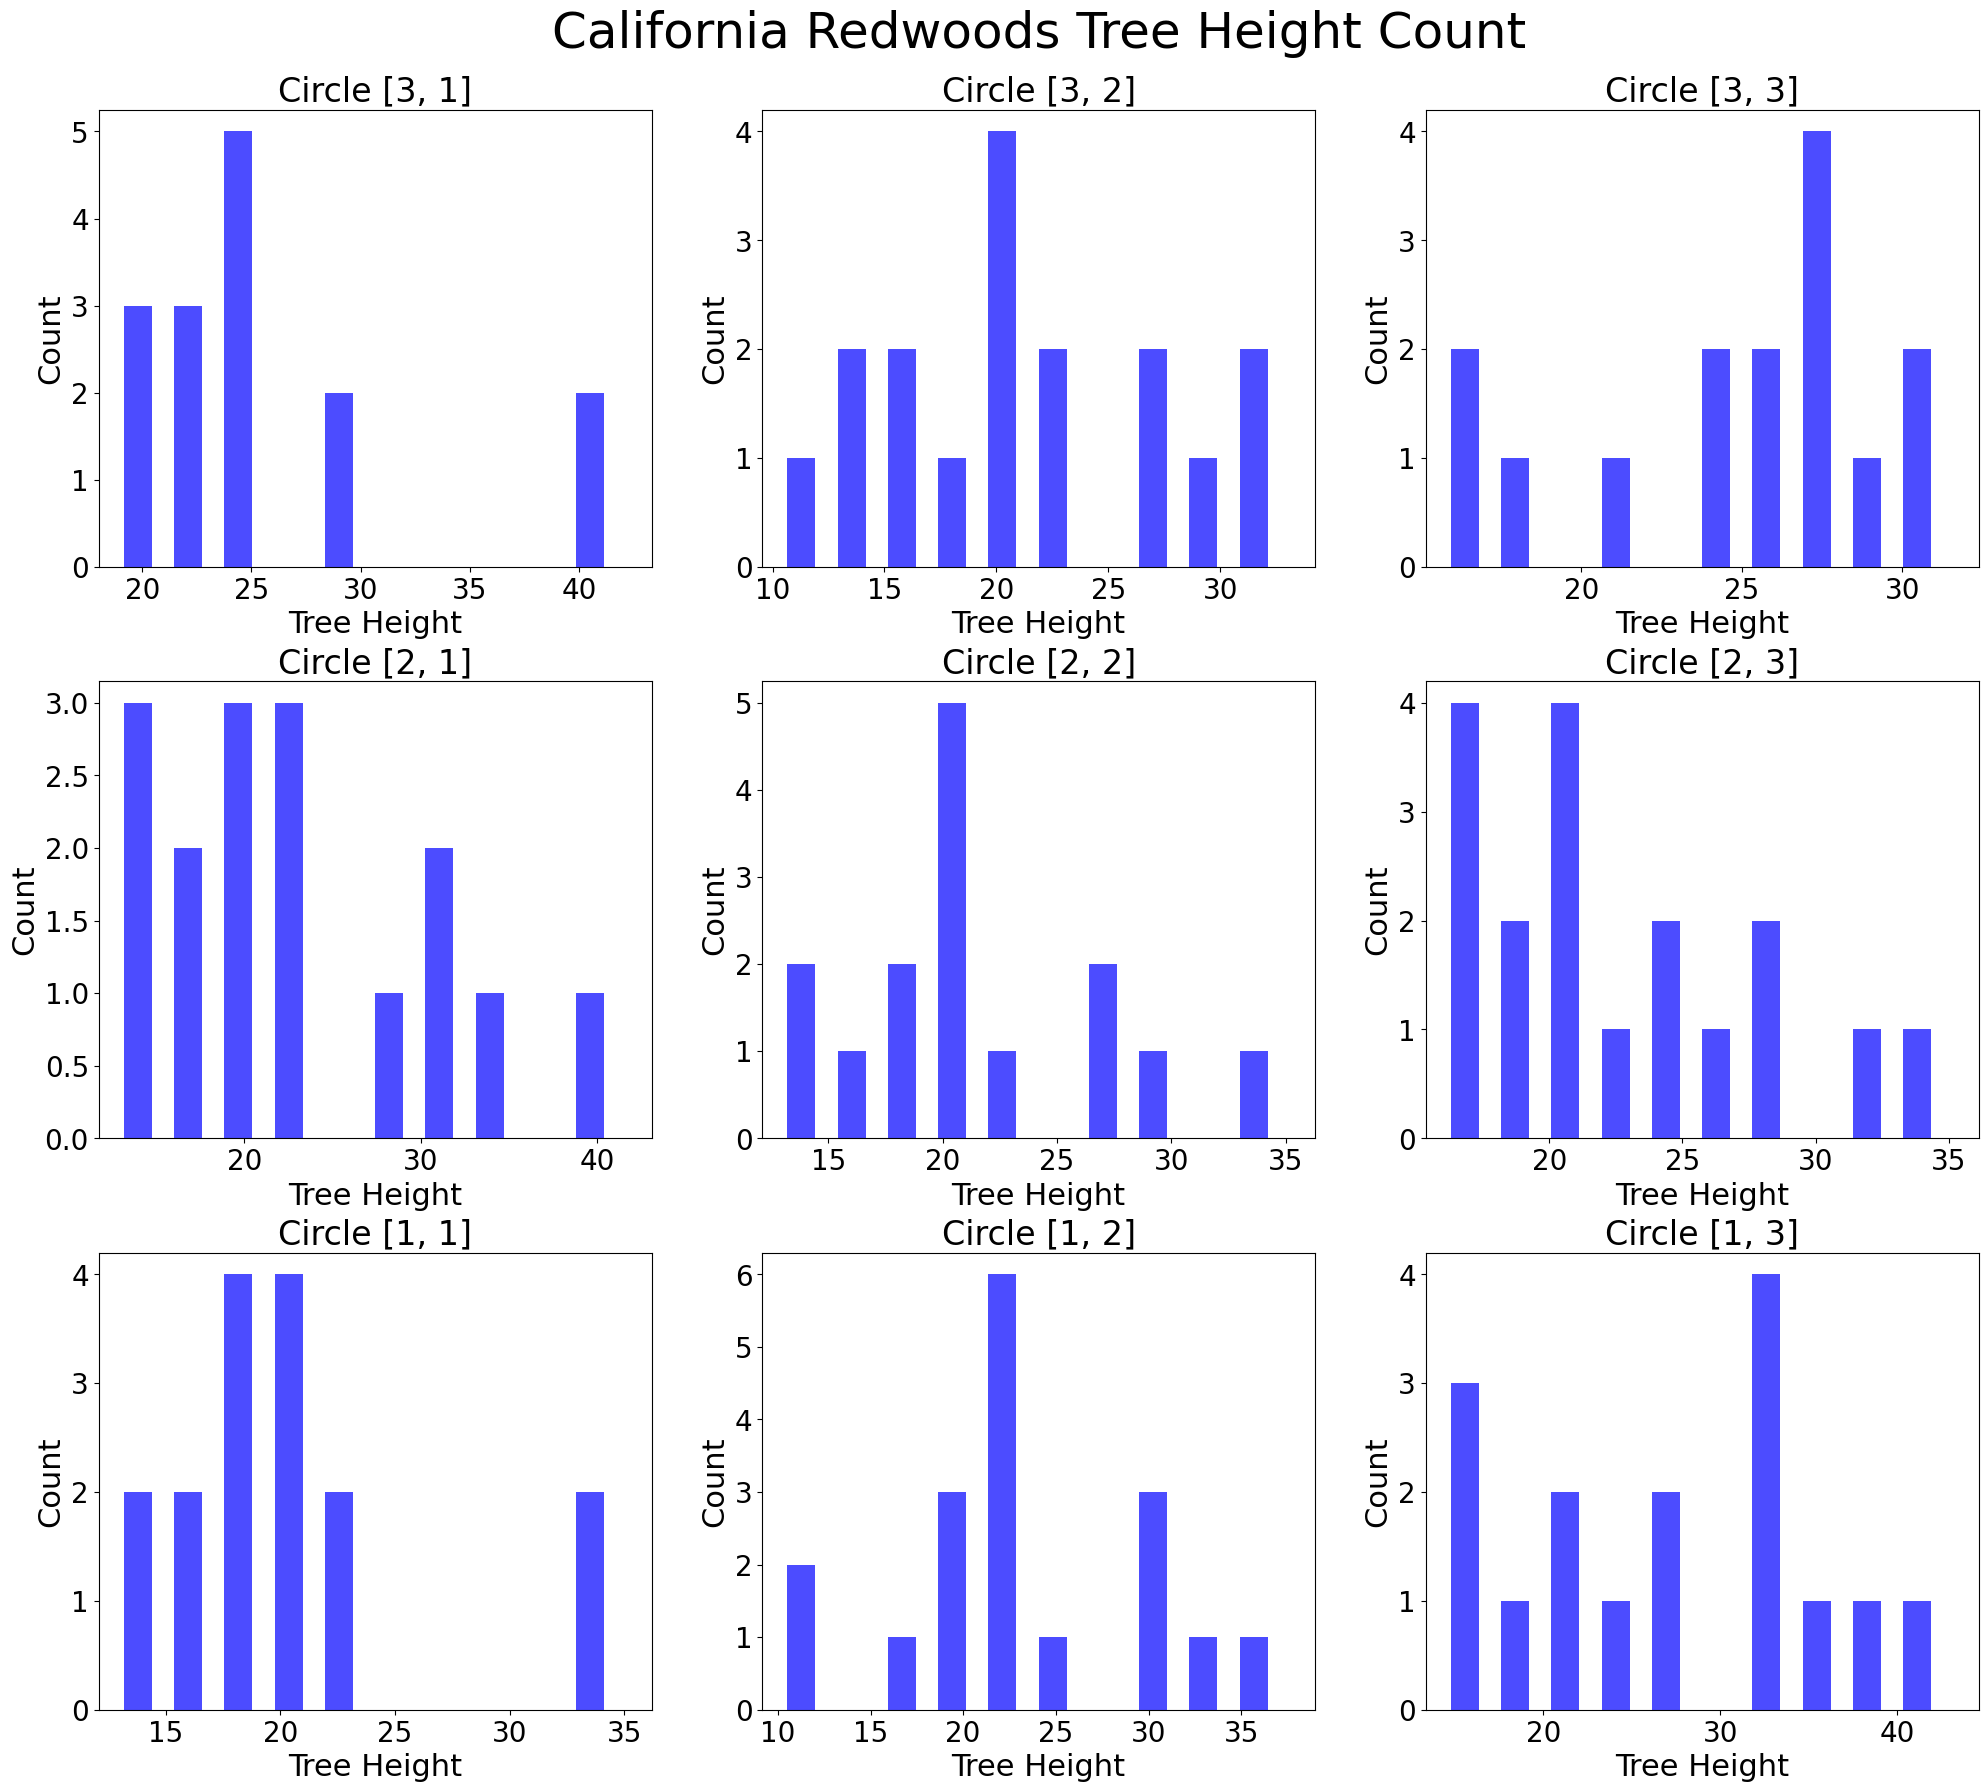

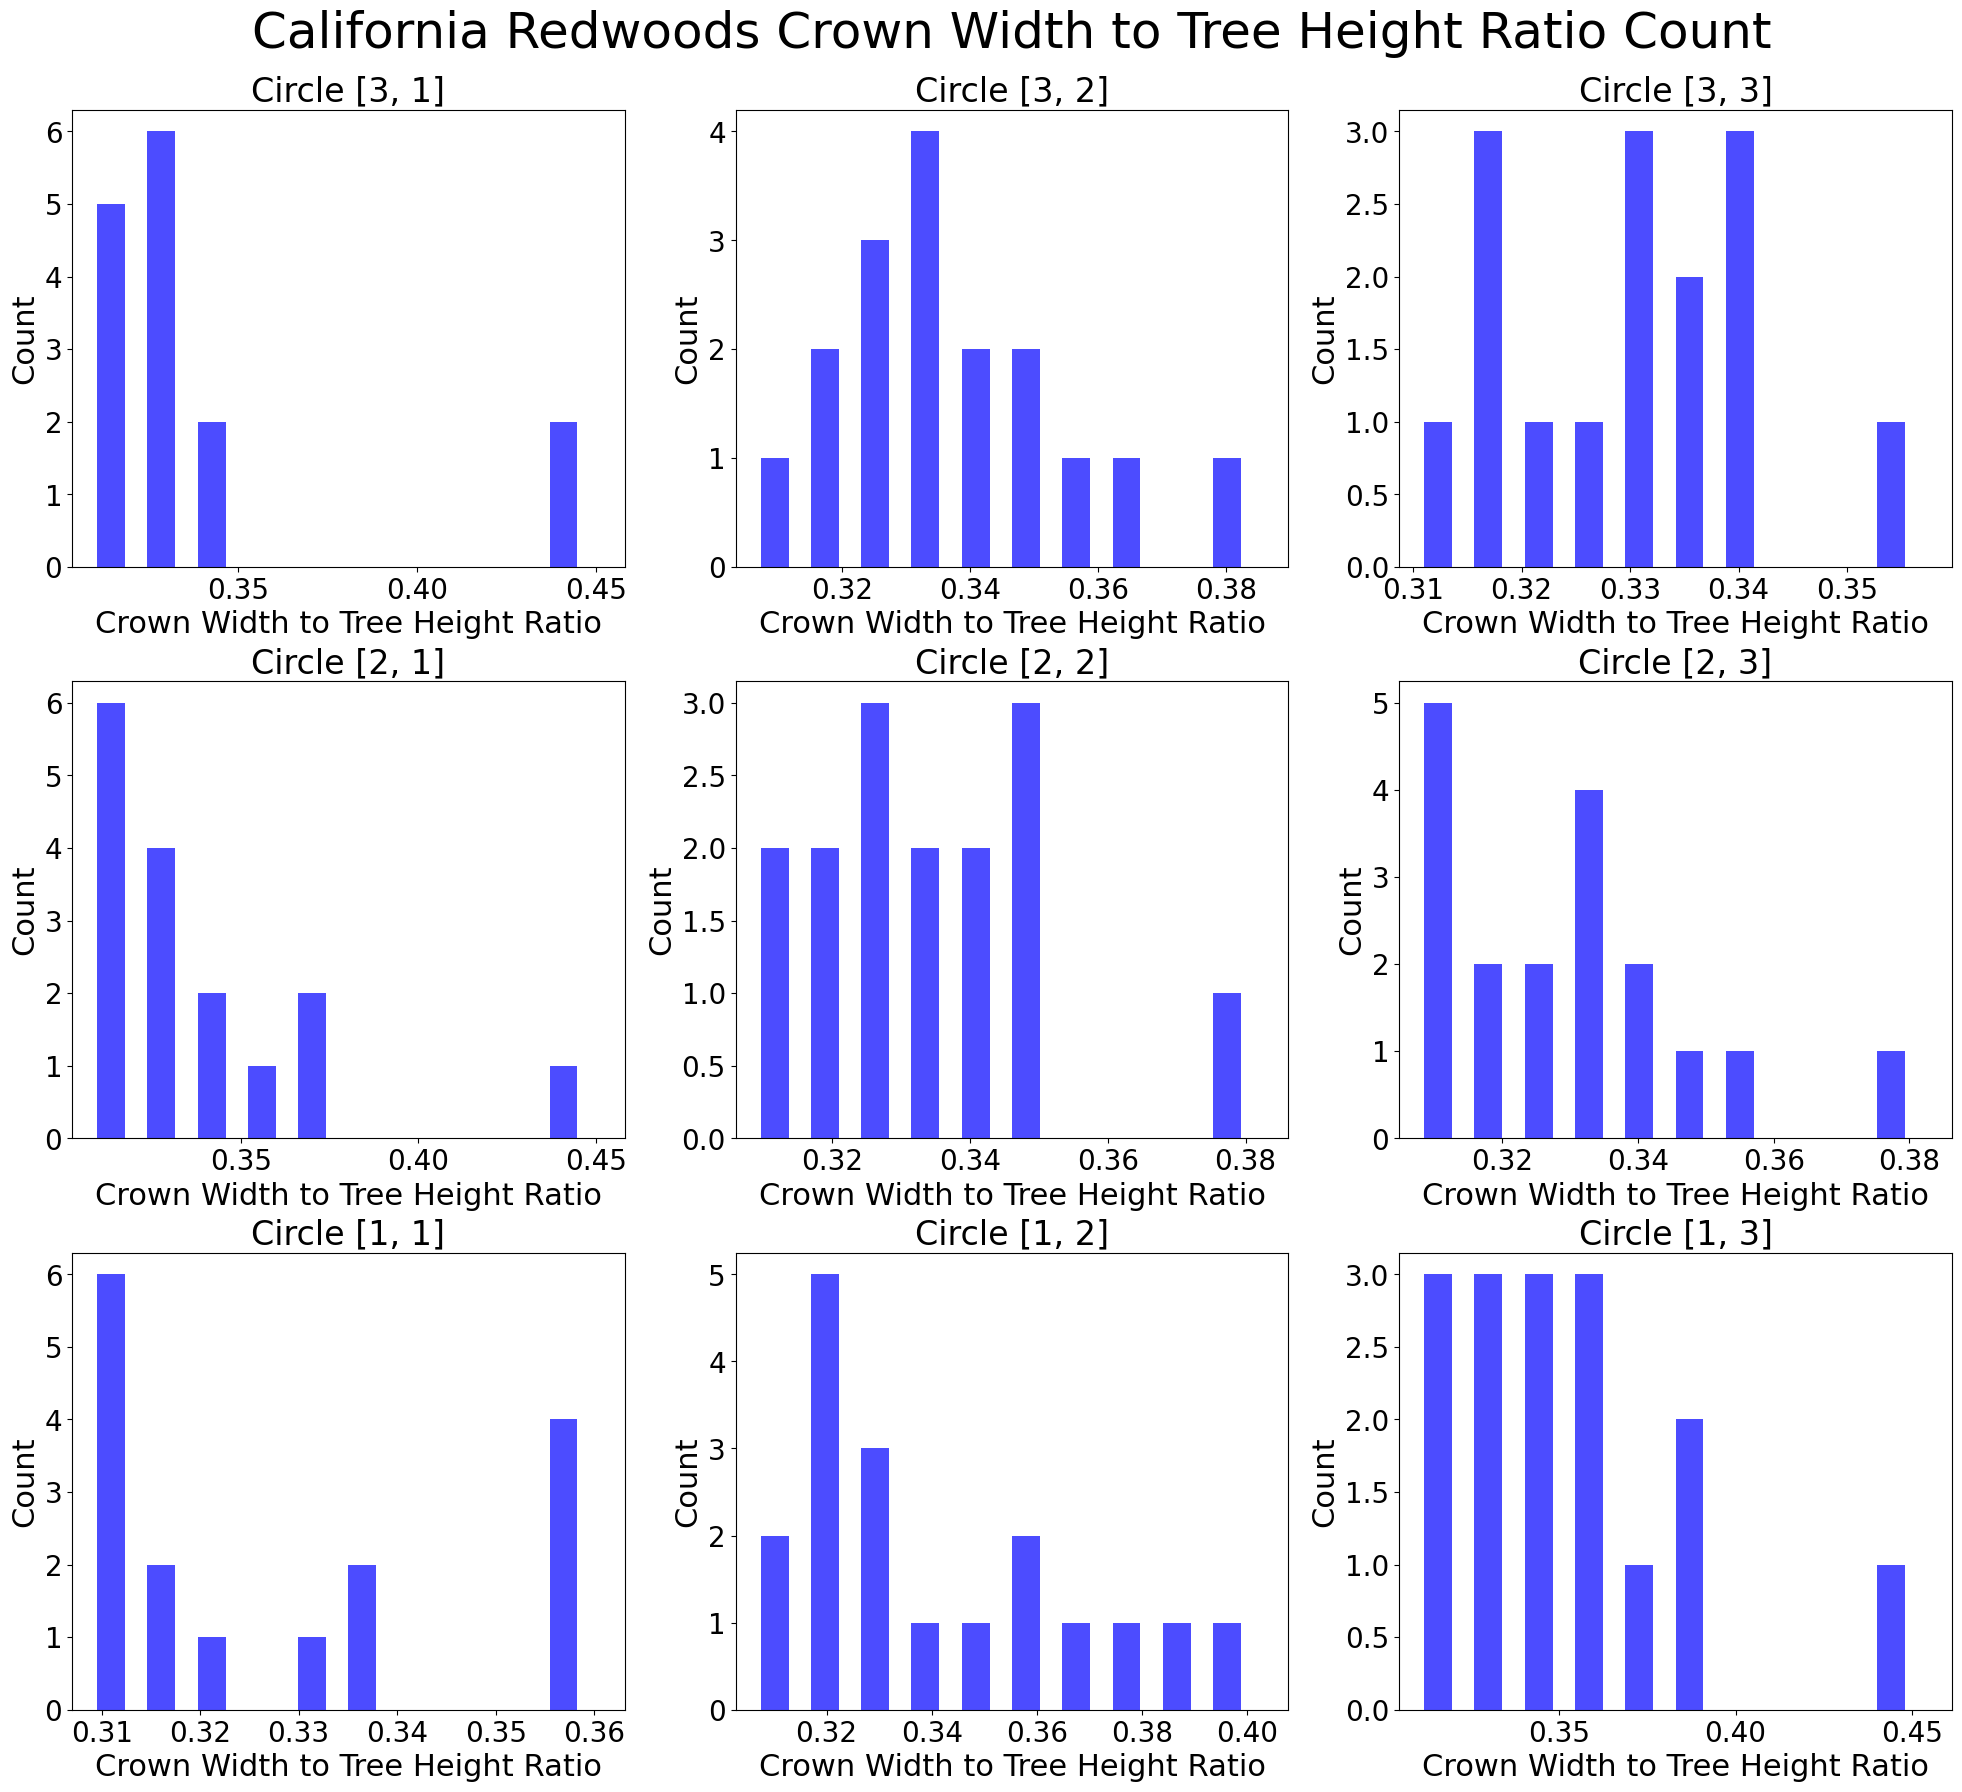

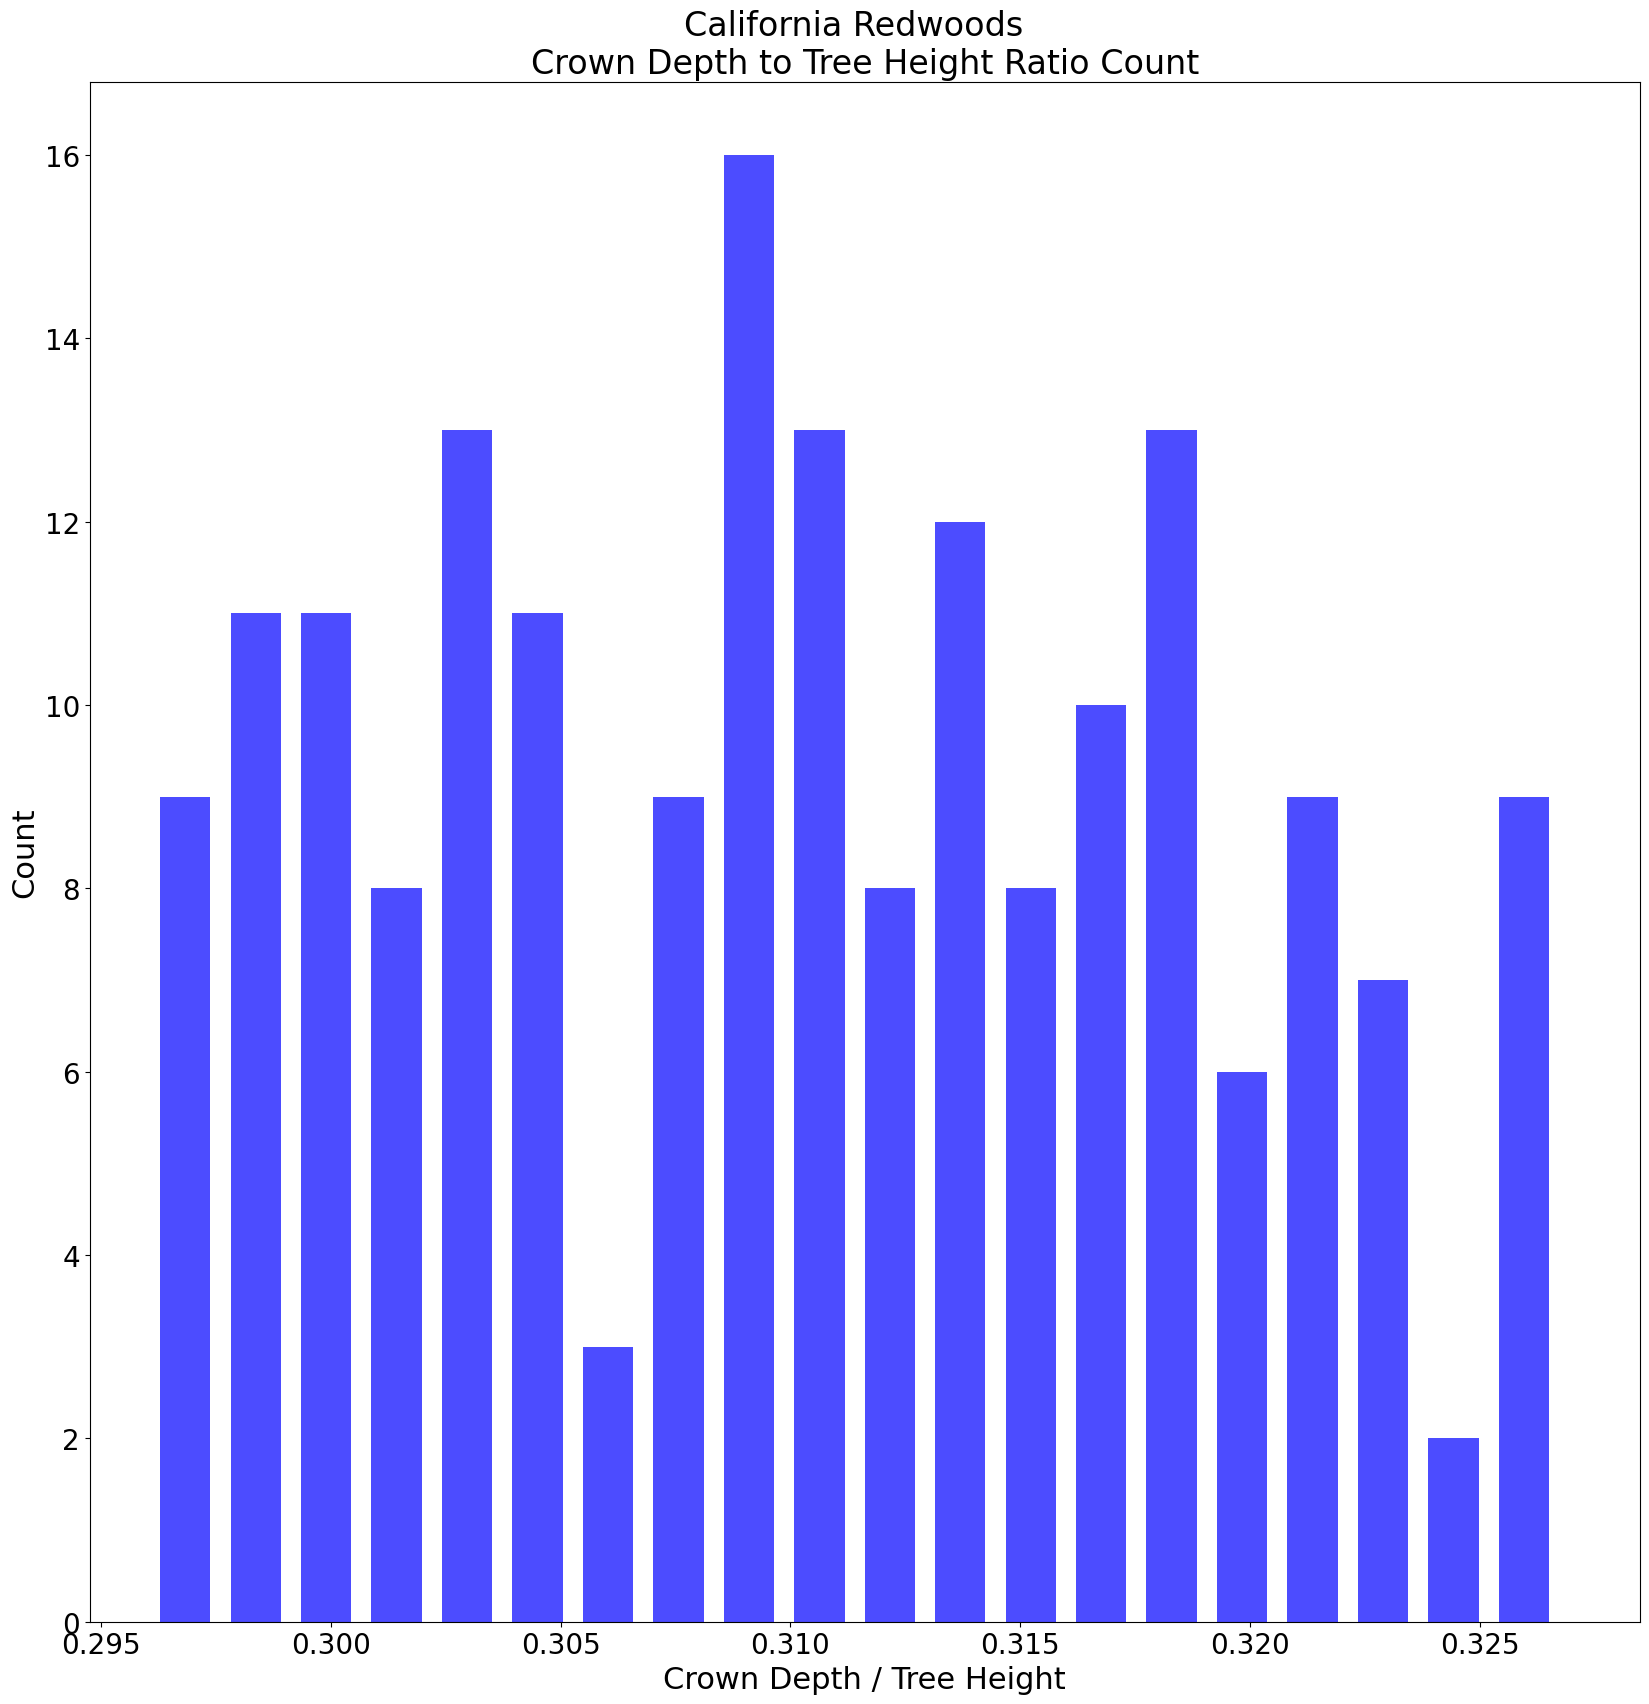

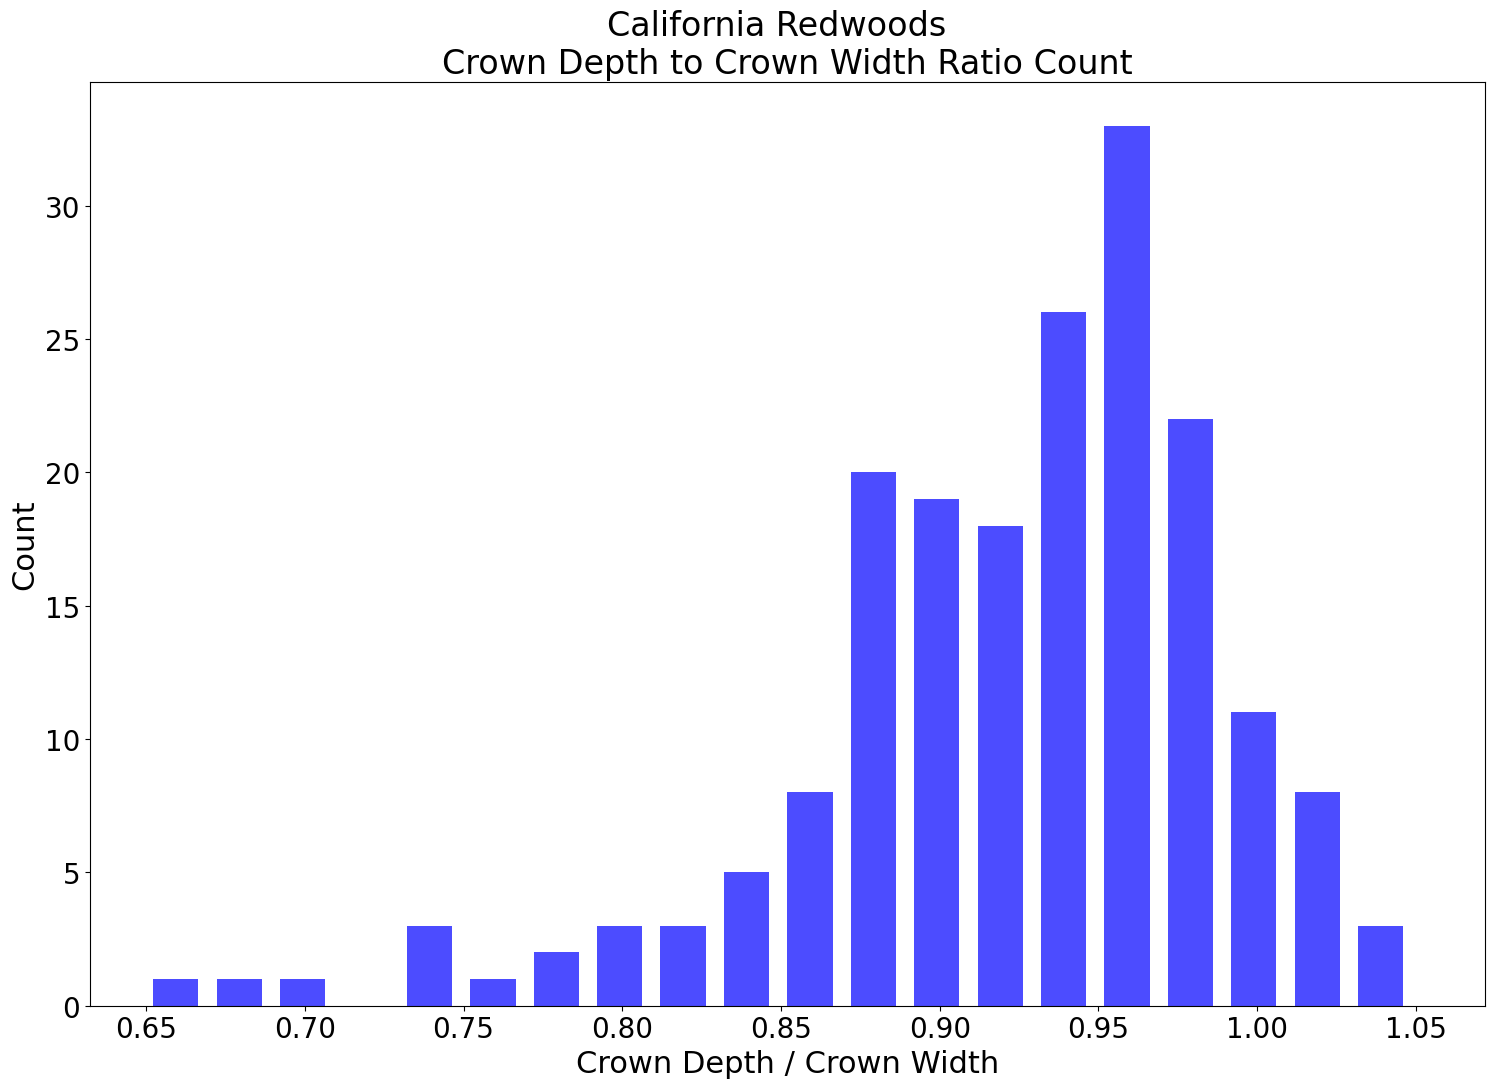

In [69]:
plot_crown_radius_count(redwood_tree_data, redwood_circle_indices, redwood_output_file_path, "redwood_crown_radius_count.png", "California Redwoods")
plot_tree_height_count(redwood_tree_data, redwood_circle_indices, redwood_output_file_path, "redwood_tree_height_count.png", "California Redwoods")
plot_crown_width_tree_height_ratio_count(redwood_tree_data, redwood_circle_indices, redwood_output_file_path, "redwood_cr_width_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_tree_height_ratio_count(redwood_tree_data, redwood_circle_indices, redwood_output_file_path, "redwood_cr_depth_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_crown_width_ratio_count(redwood_tree_data, redwood_circle_indices, redwood_output_file_path, "redwood_cr_depth_cr_width_ratio_metrics.png", "California Redwoods")

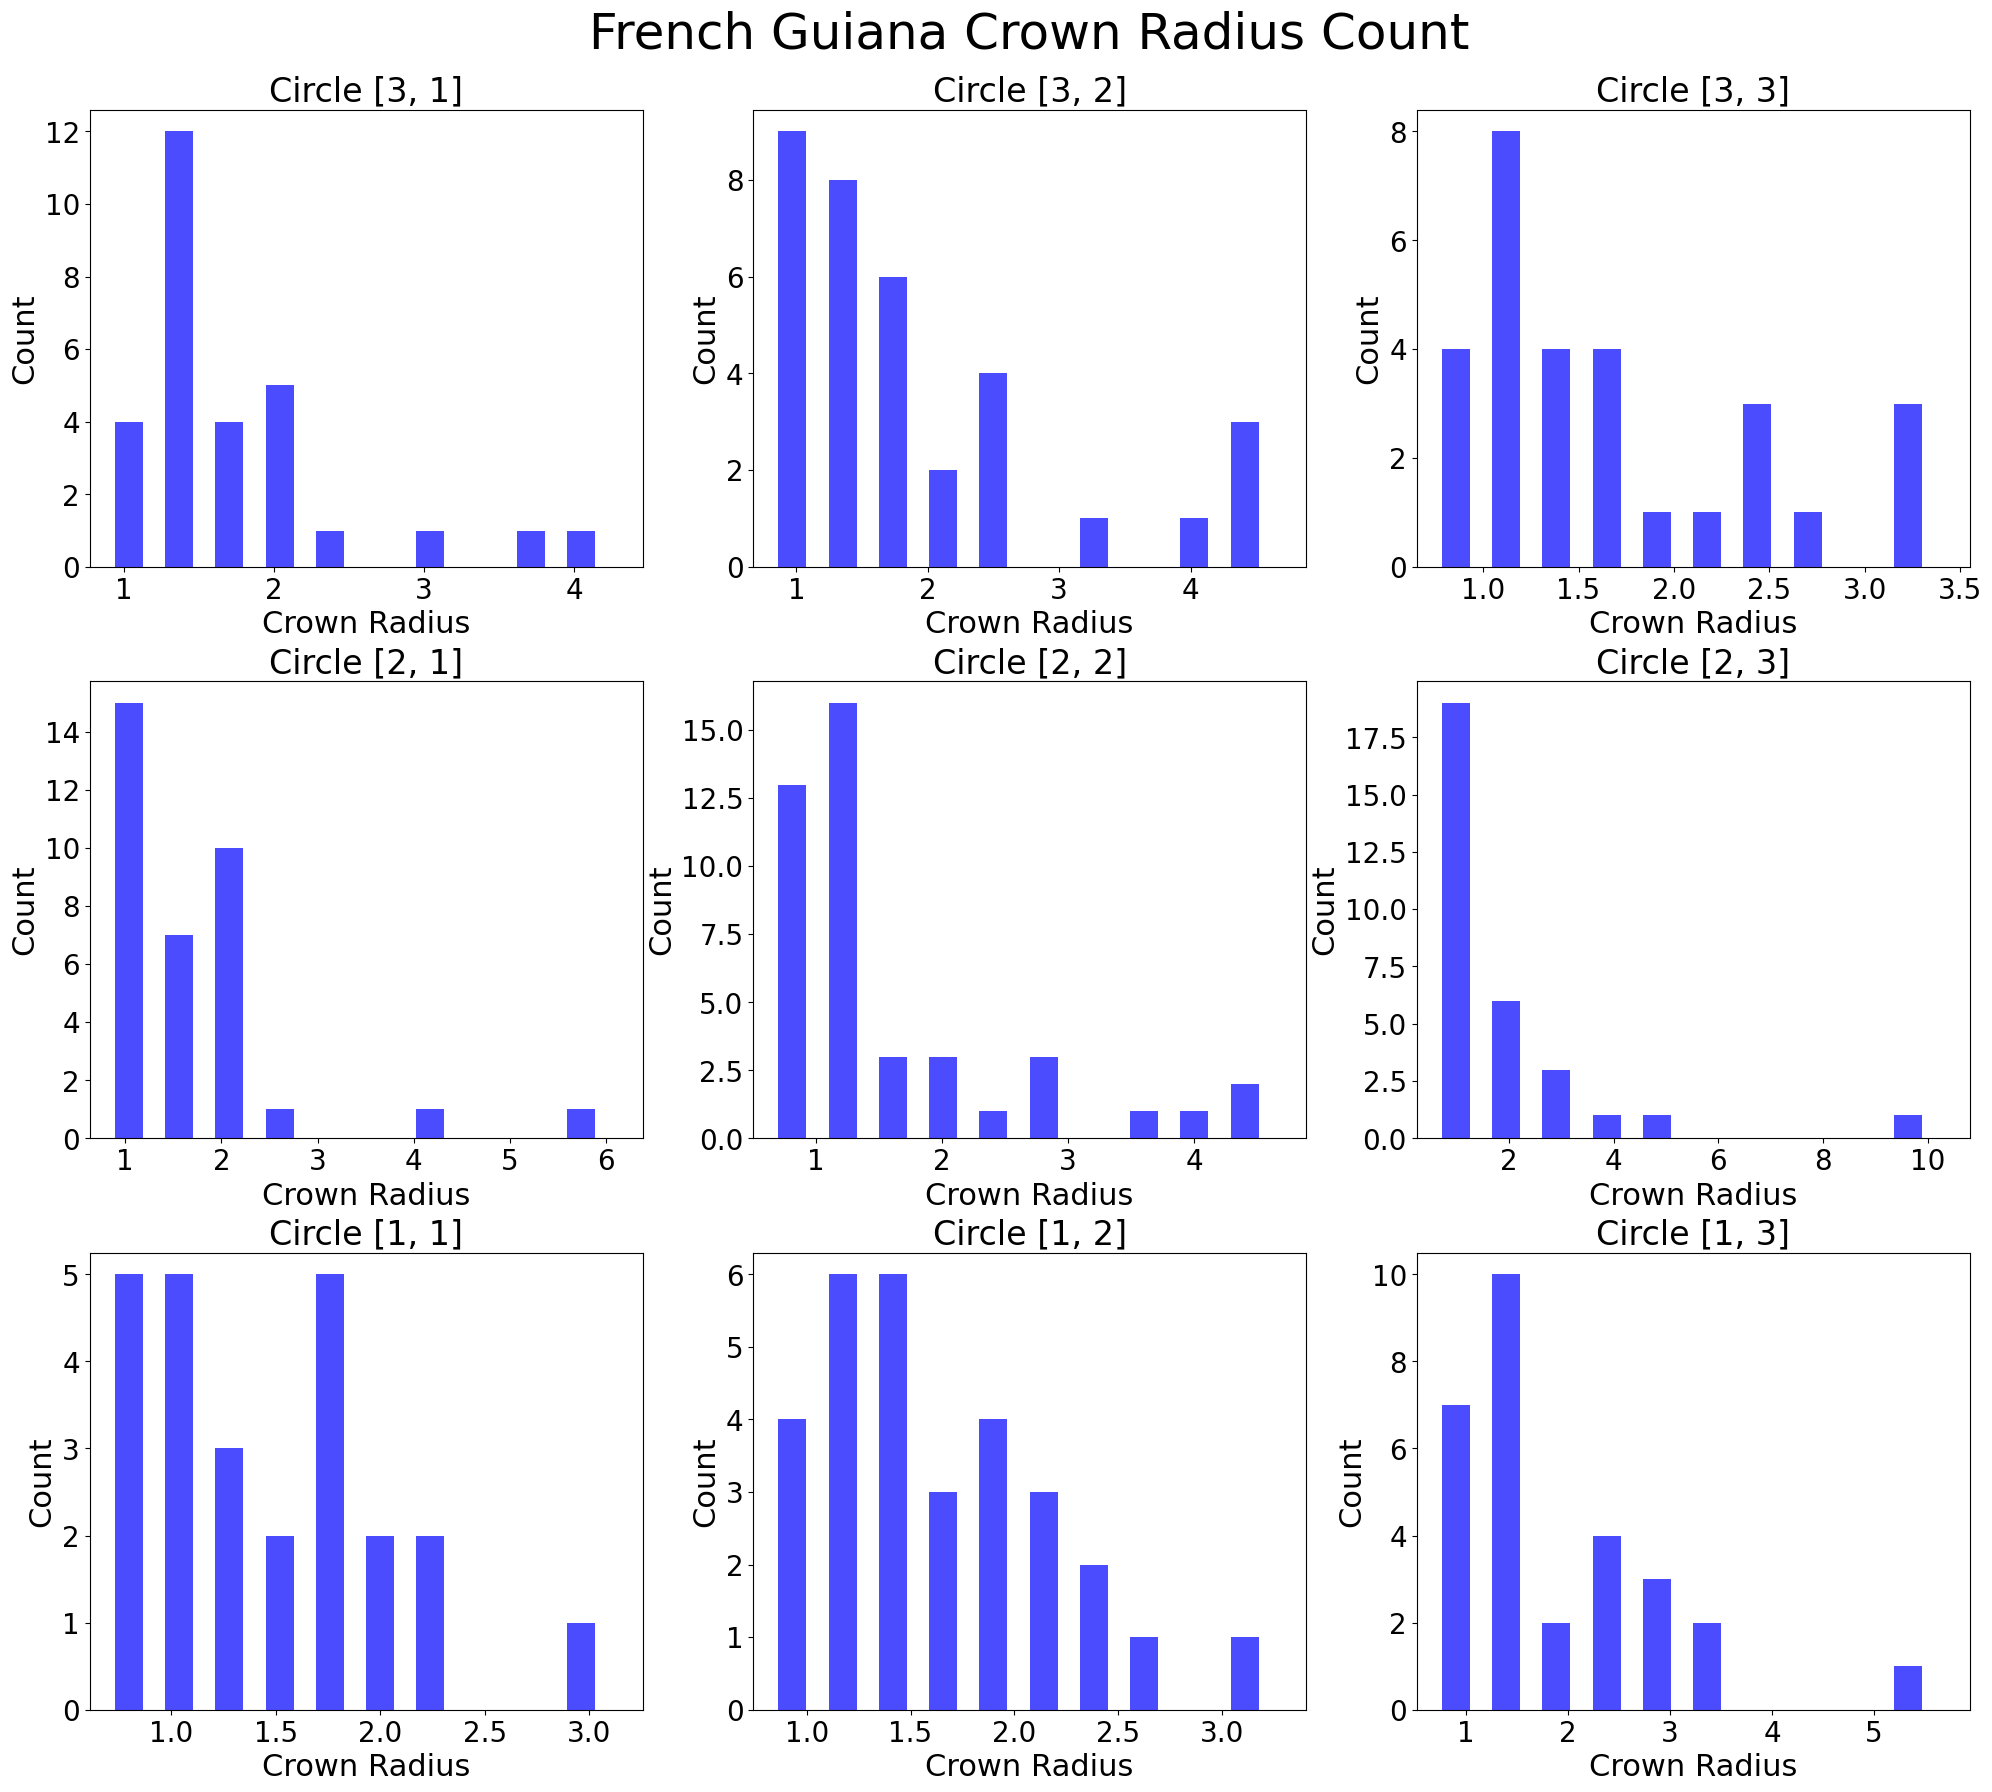

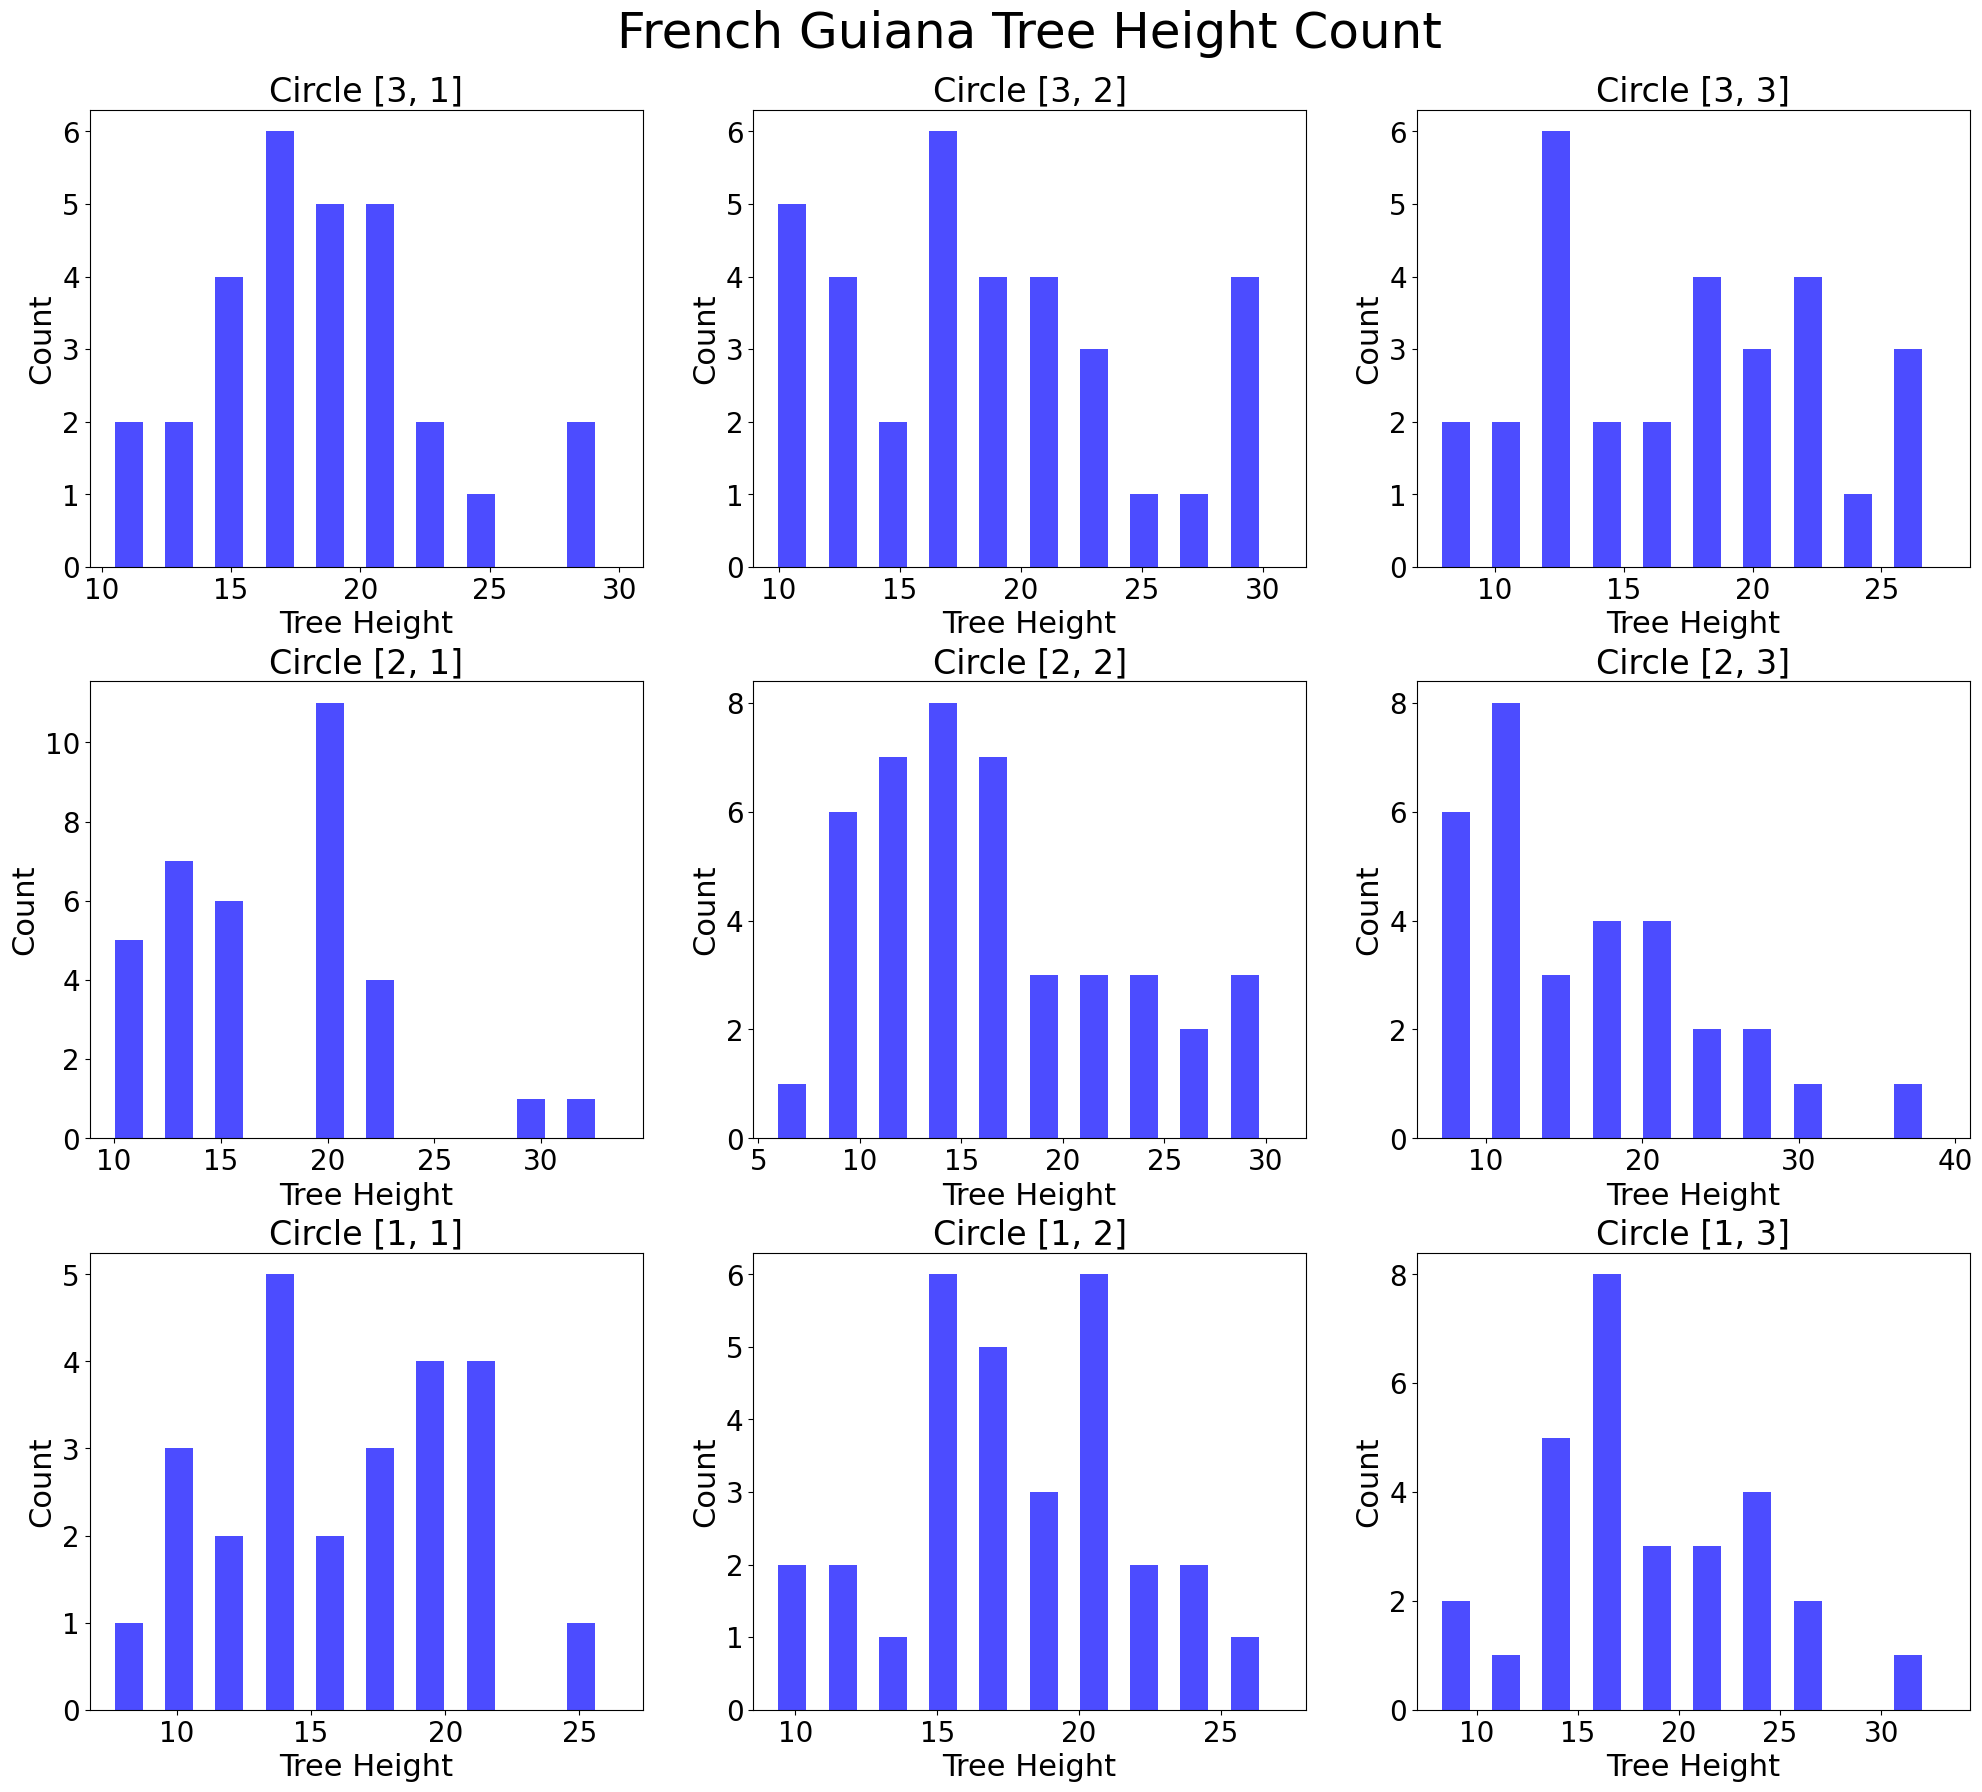

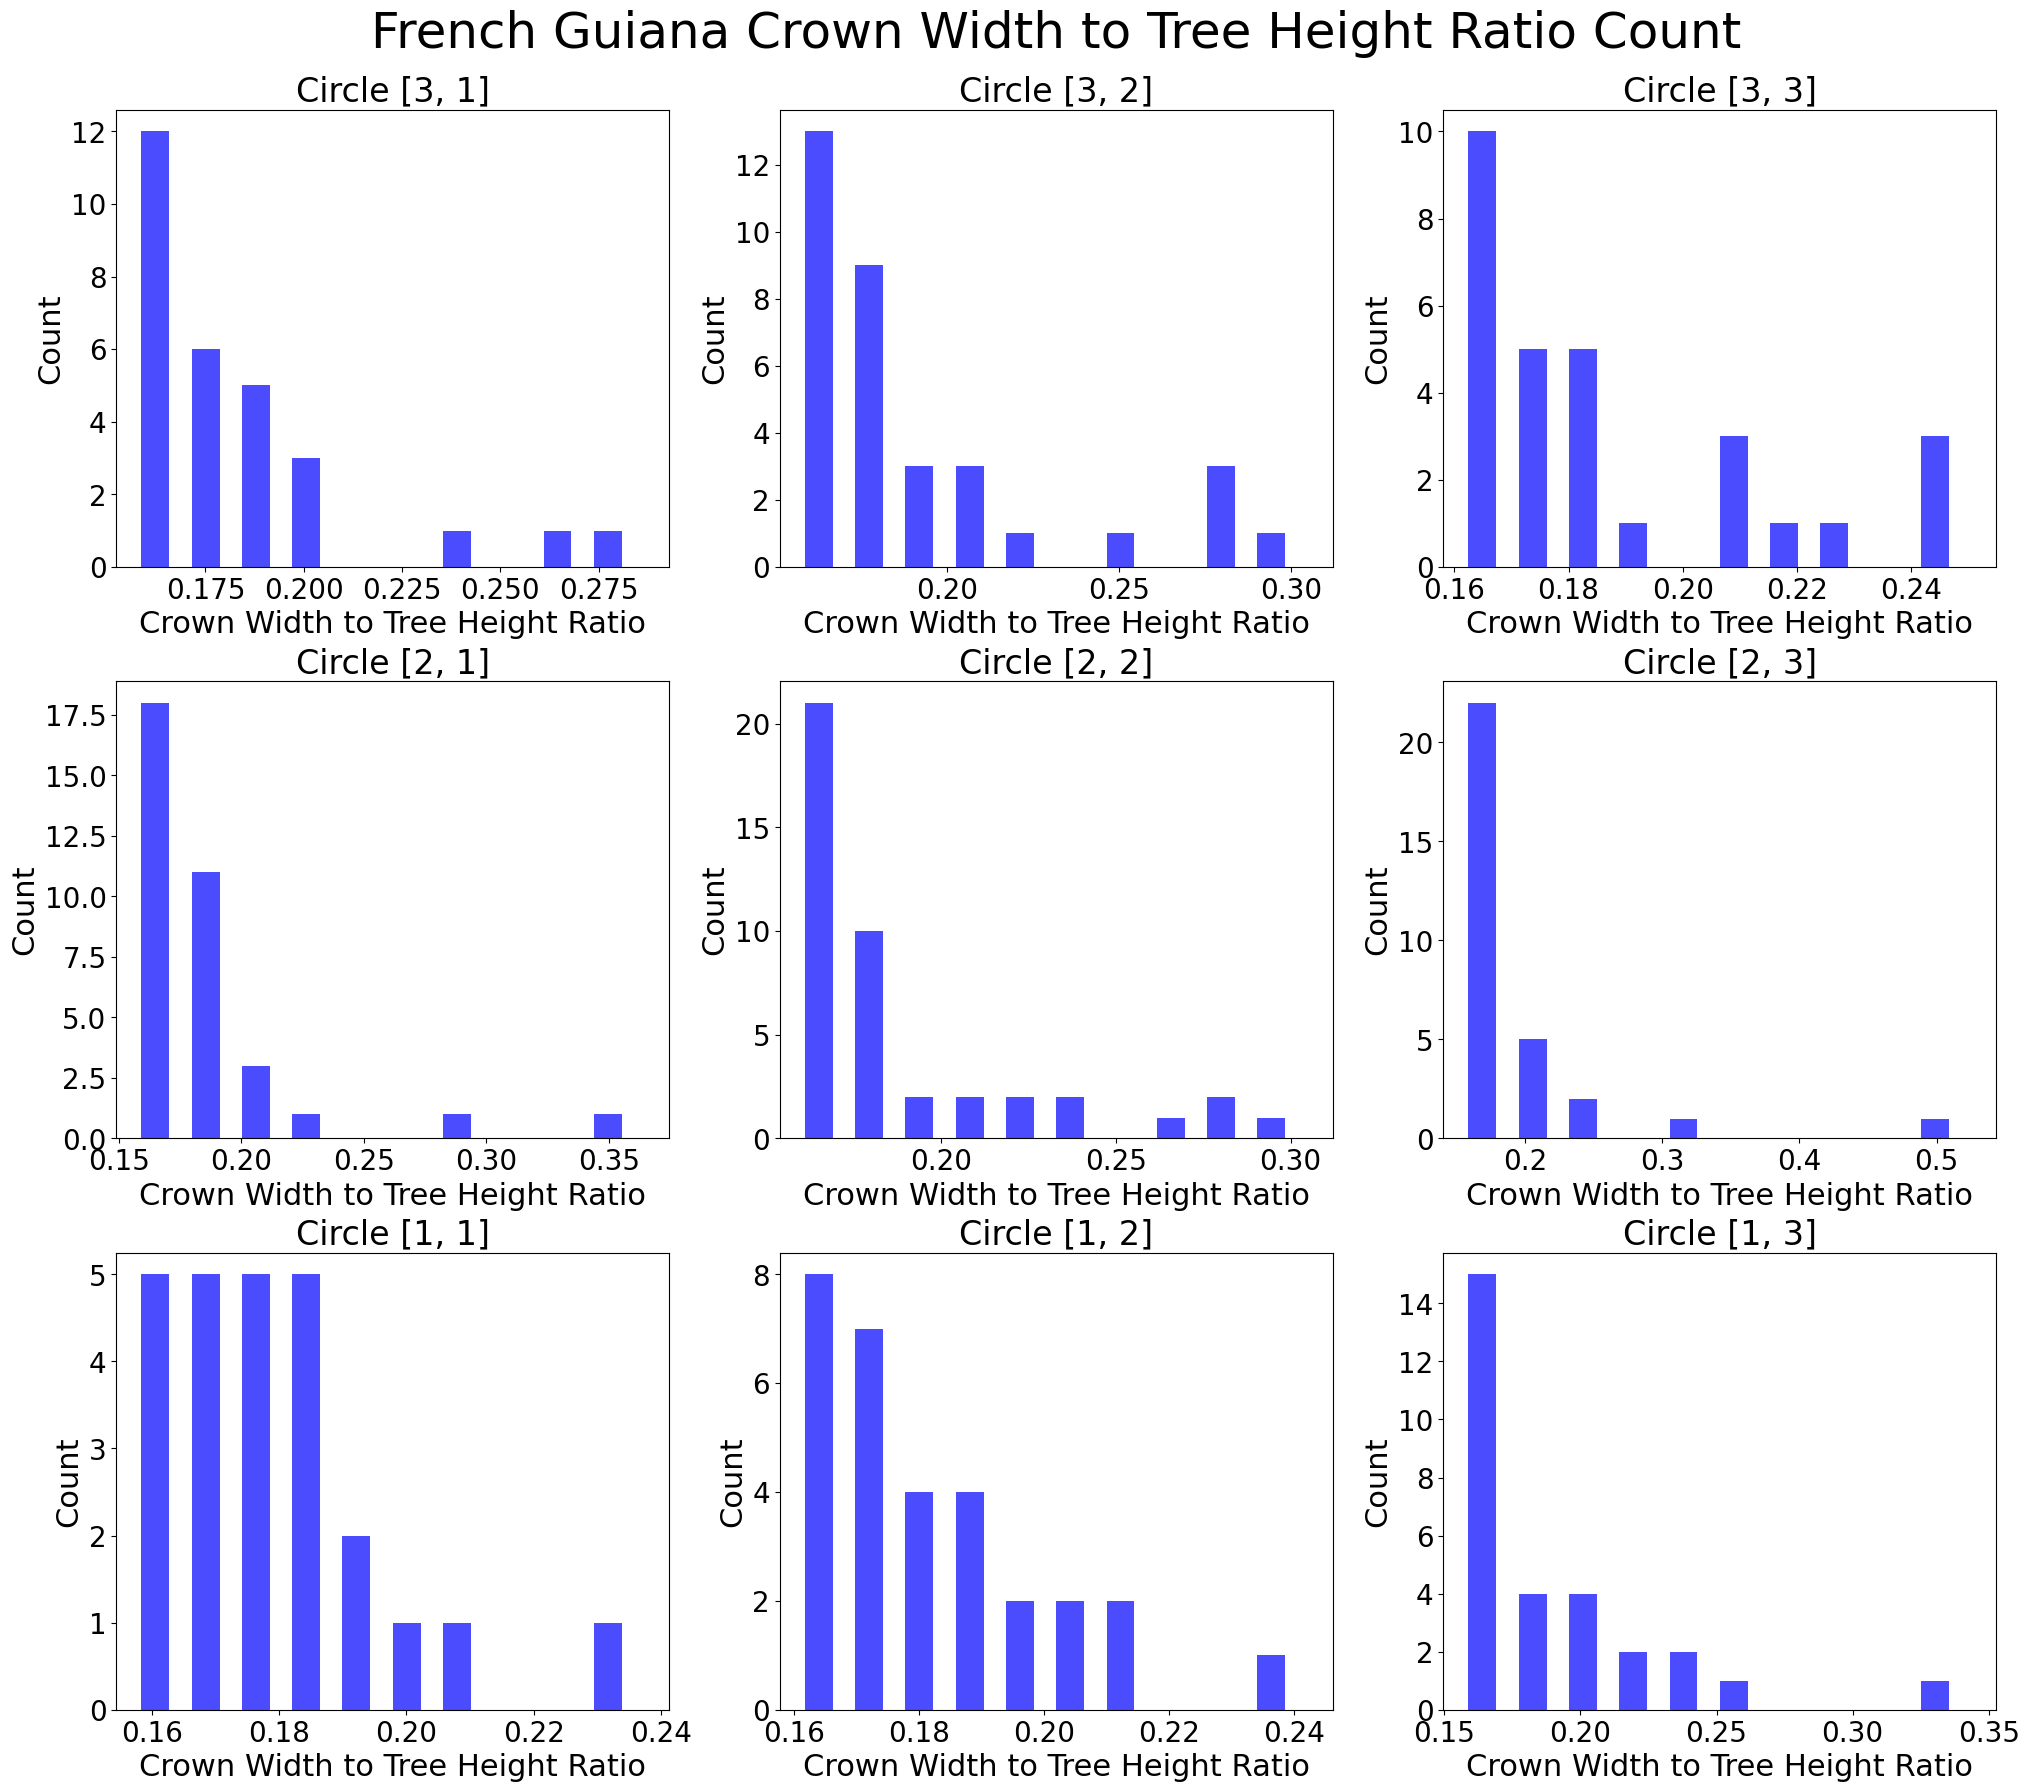

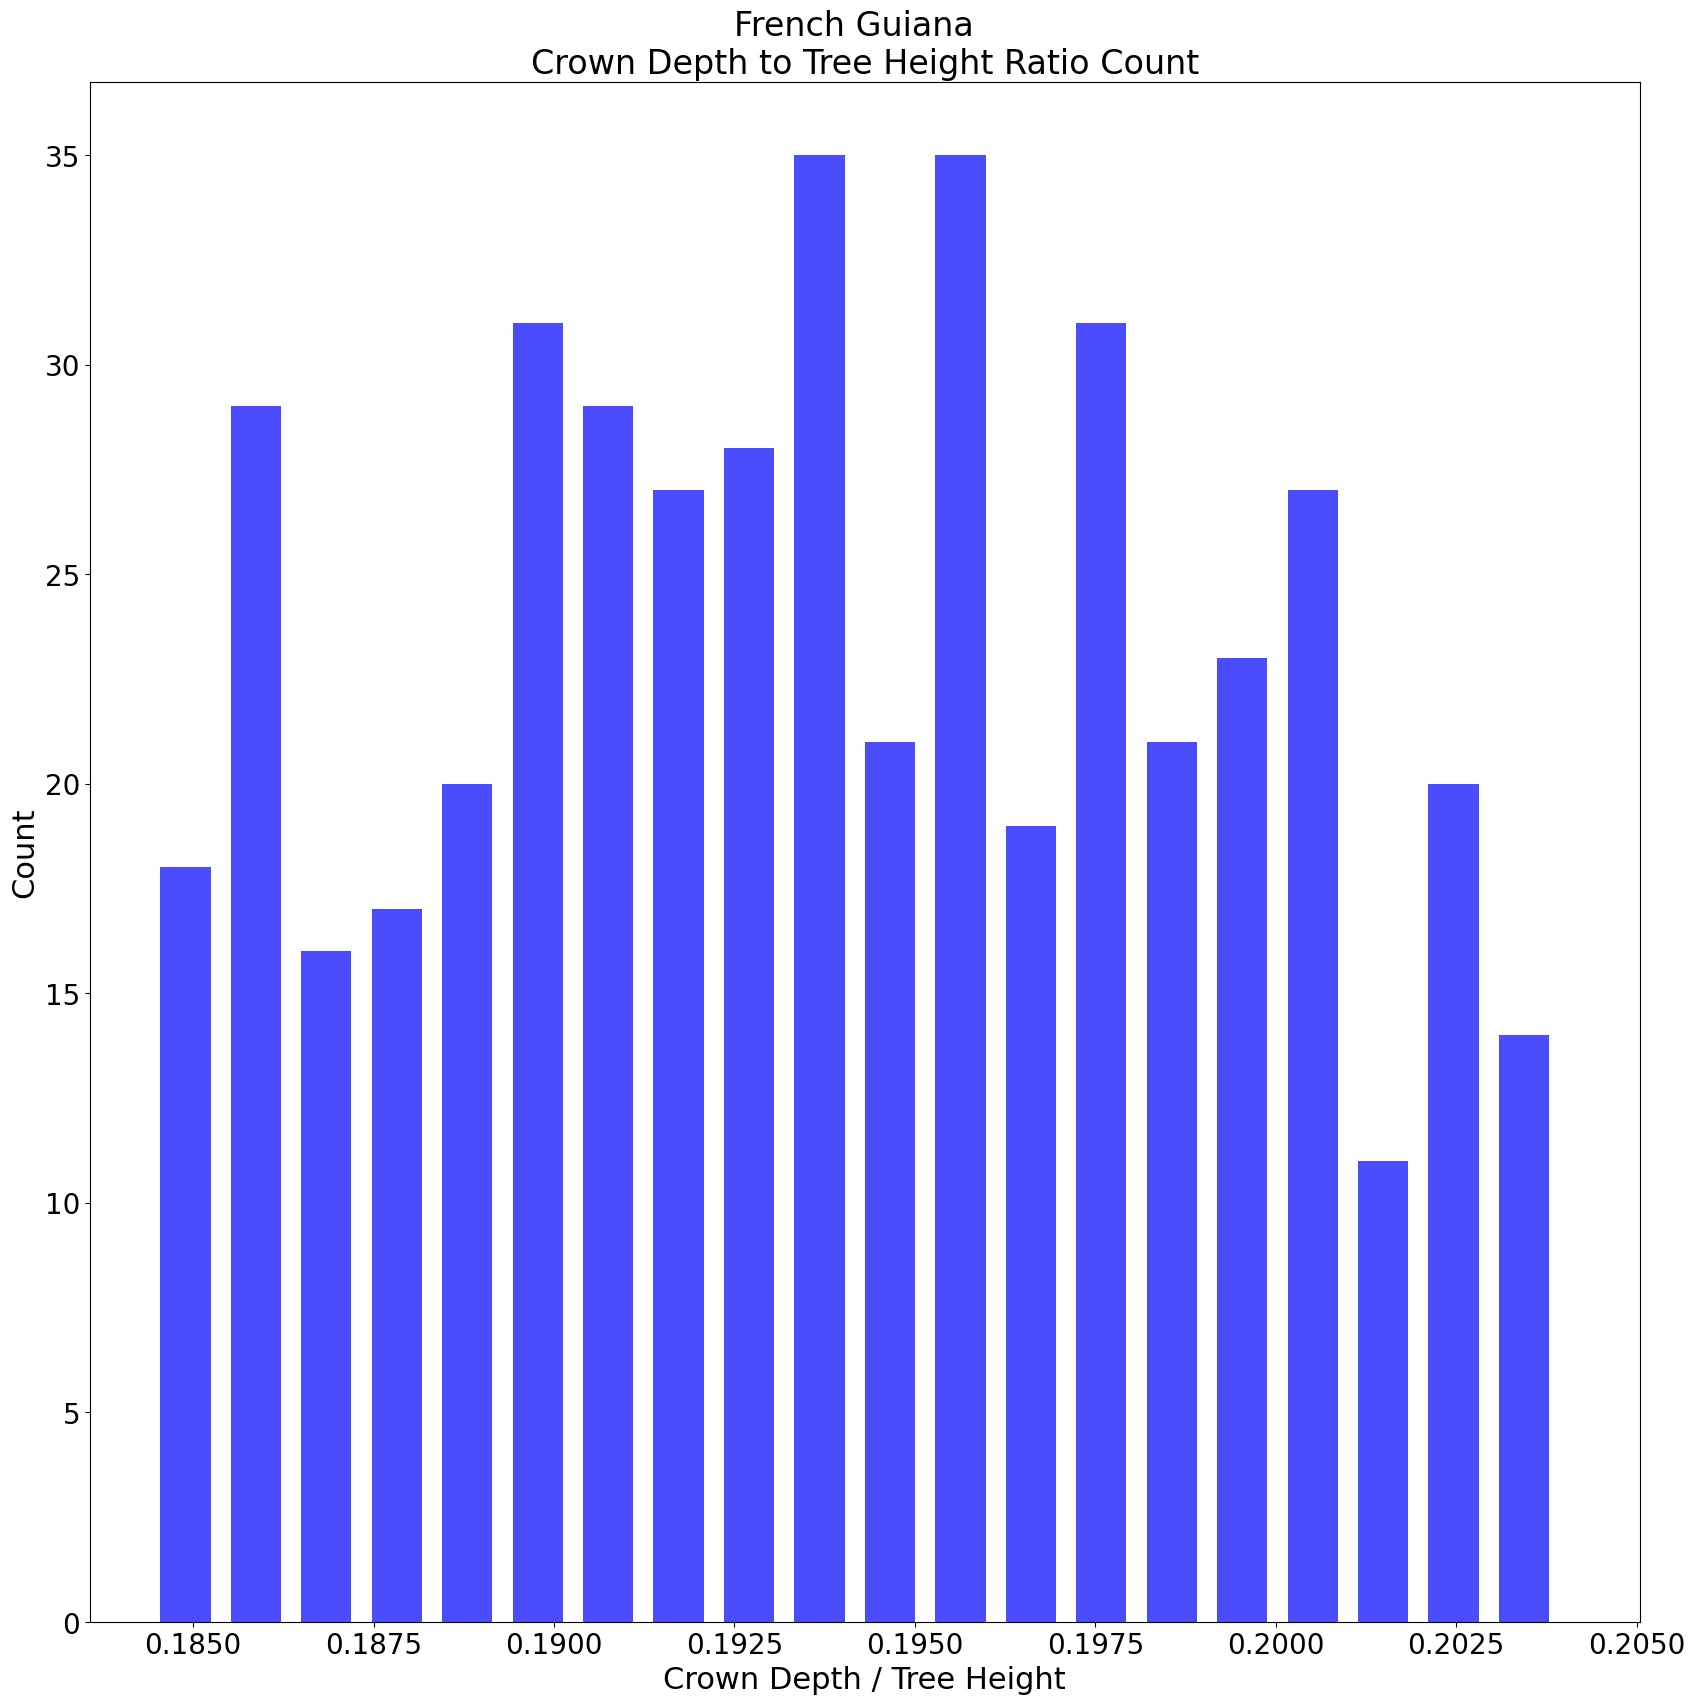

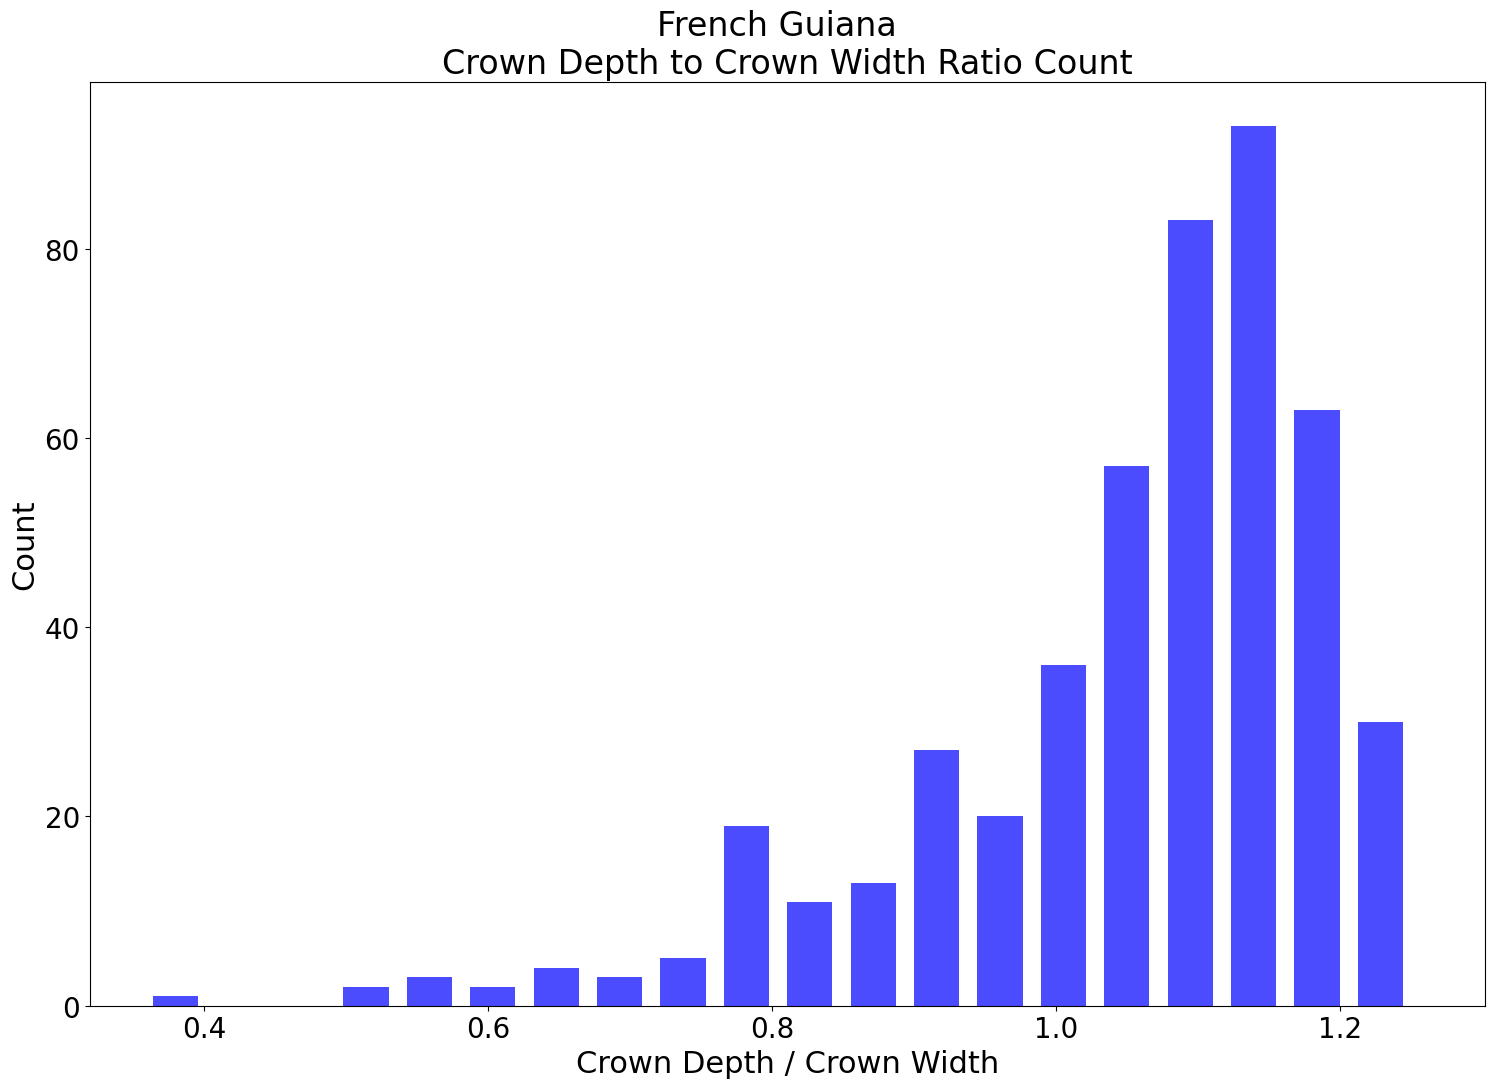

In [70]:
plot_crown_radius_count(guiana_tree_data, guiana_circle_indices, guiana_output_file_path, "guiana_crown_radius_count.png", "French Guiana")
plot_tree_height_count(guiana_tree_data, guiana_circle_indices, guiana_output_file_path, "guiana_tree_height_count.png", "French Guiana")
plot_crown_width_tree_height_ratio_count(guiana_tree_data, guiana_circle_indices, guiana_output_file_path, "guiana_cr_width_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_tree_height_ratio_count(guiana_tree_data, guiana_circle_indices, guiana_output_file_path, "guiana_cr_depth_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_crown_width_ratio_count(guiana_tree_data, guiana_circle_indices, guiana_output_file_path, "guiana_cr_depth_cr_width_ratio_metrics.png", "French Guiana")

In [71]:
def plot_mean_std_values(circle_indices, output_folder, output_filename, plot_title):
    # Initialize lists to store data
    circle_names = []
    mean_d1_values = []
    std_d1_values = []
    mean_d2_values = []
    std_d2_values = []
    mean_crown_center_height = []
    std_crown_center_height = []
    mean_tree_height = []
    std_tree_height = []
    LAI_per_pixel = []
    Fa = []

    # Iterate over each circle's data
    for circle_name, data in circle_indices.items():
        # Append circle name to the list
        circle_names.append(circle_name)
        
        # Append mean and std values to the lists
        mean_d1_values.append(data['mean_crown_d1'])
        std_d1_values.append(data['std_crown_d1'])
        mean_d2_values.append(data['mean_crown_d2'])
        std_d2_values.append(data['std_crown_d2'])
        mean_crown_center_height.append(data['mean_crown_center_height'])
        std_crown_center_height.append(data['std_crown_center_height'])
        mean_tree_height.append(data['mean_tree_height'])
        std_tree_height.append(data['std_tree_height'])
        LAI_per_pixel.append(data['LAI_without_branch'])
        Fa.append(data['Fa'])

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(35, 24))

    # Set global plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Plot data
    axs[0, 0].bar(circle_names, mean_d1_values, yerr=std_d1_values, capsize=5)
    axs[0, 0].set_title('Mean and Std of Vertical Crown Radius')
    axs[0, 0].set_ylabel('d1 Values')

    axs[0, 1].bar(circle_names, mean_d2_values, yerr=std_d2_values, capsize=5)
    axs[0, 1].set_title('Mean and Std of Horizontal Crown Radius')
    axs[0, 1].set_ylabel('d2 Values')

    axs[0, 2].bar(circle_names, mean_crown_center_height, yerr=std_crown_center_height, capsize=5)
    axs[0, 2].set_title('Mean and Std of Crown Center Height')
    axs[0, 2].set_ylabel('Crown Center Height Values')

    axs[1, 0].bar(circle_names, mean_tree_height, yerr=std_tree_height, capsize=5)
    axs[1, 0].set_title('Mean and Std of Tree Height')
    axs[1, 0].set_ylabel('Tree Height Values')

    axs[1, 1].bar(circle_names, LAI_per_pixel)
    axs[1, 1].set_title('LAI (leaf only) per Unit Area')
    axs[1, 1].set_ylabel('LAI (leaf only) per Pixel')

    axs[1, 2].bar(circle_names, Fa)
    axs[1, 2].set_title('Fa')
    axs[1, 2].set_ylabel('Fa Values')

    for ax in axs.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} \nMean and Std Values', x=0.5, y=0.95, fontsize=36)

    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    # Show the plot
    plt.show()

C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

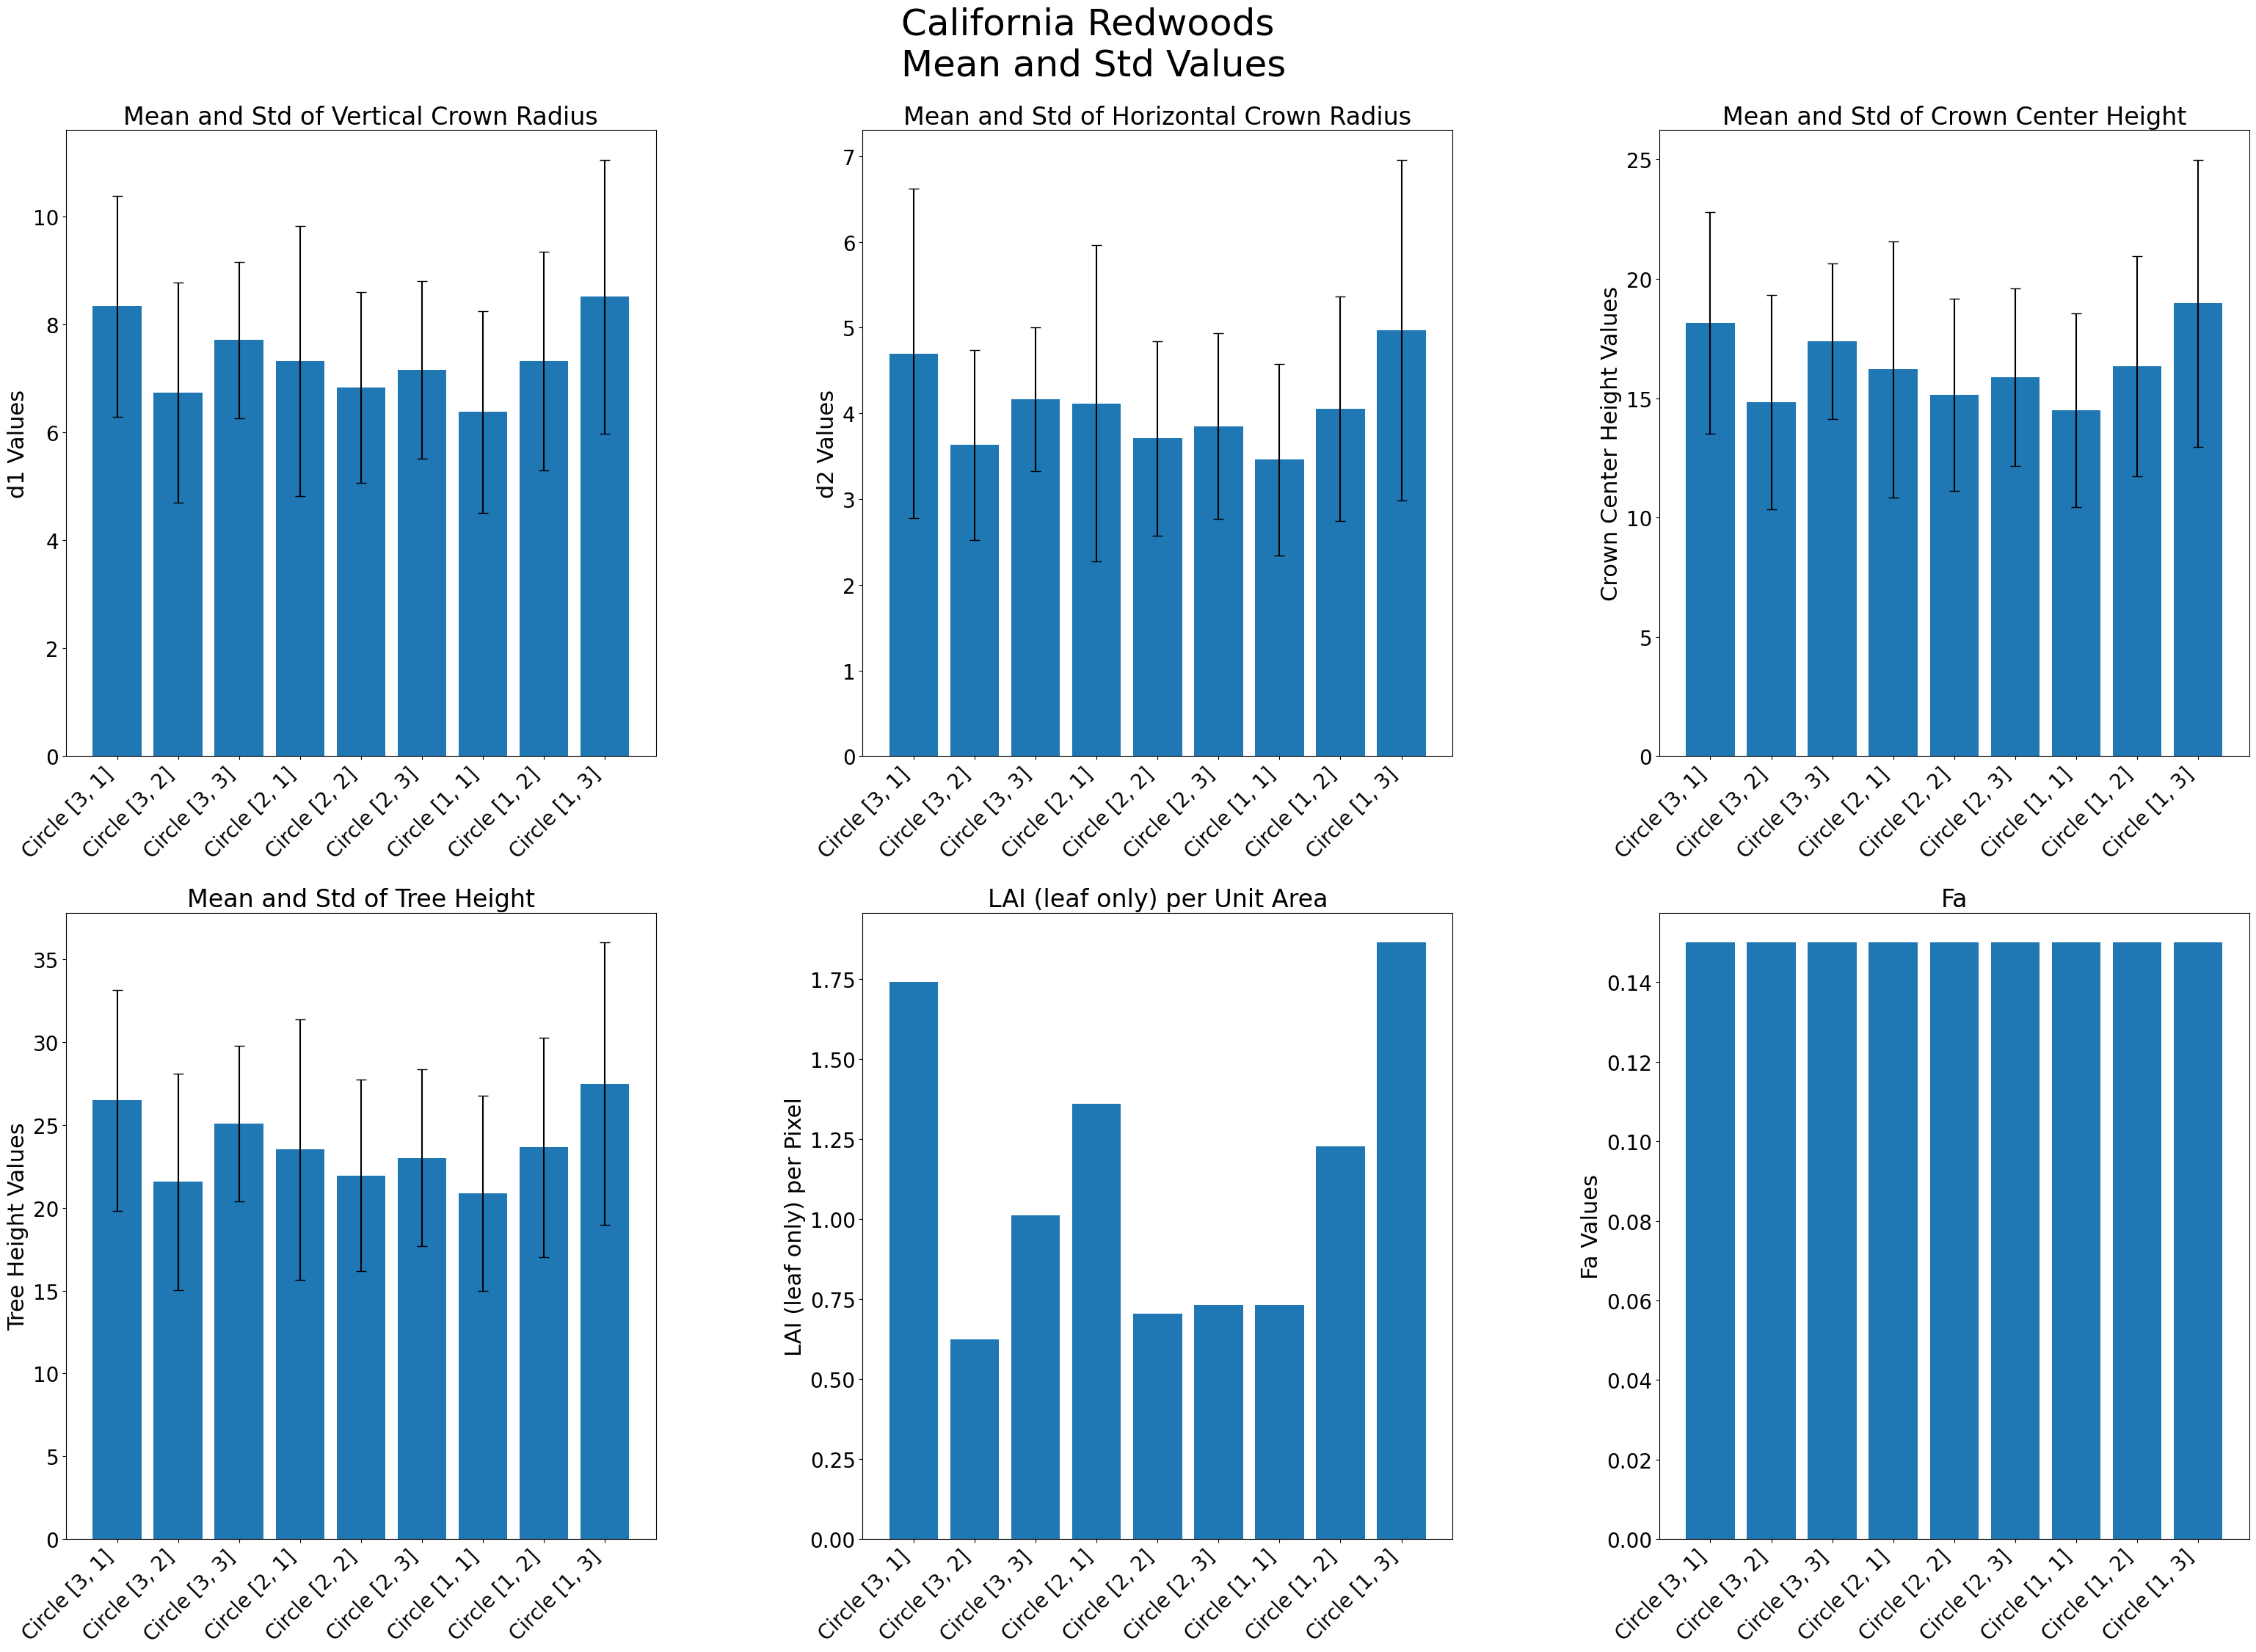

C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\allen\AppData\Local\Temp\ipykernel_31808\2001053730.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

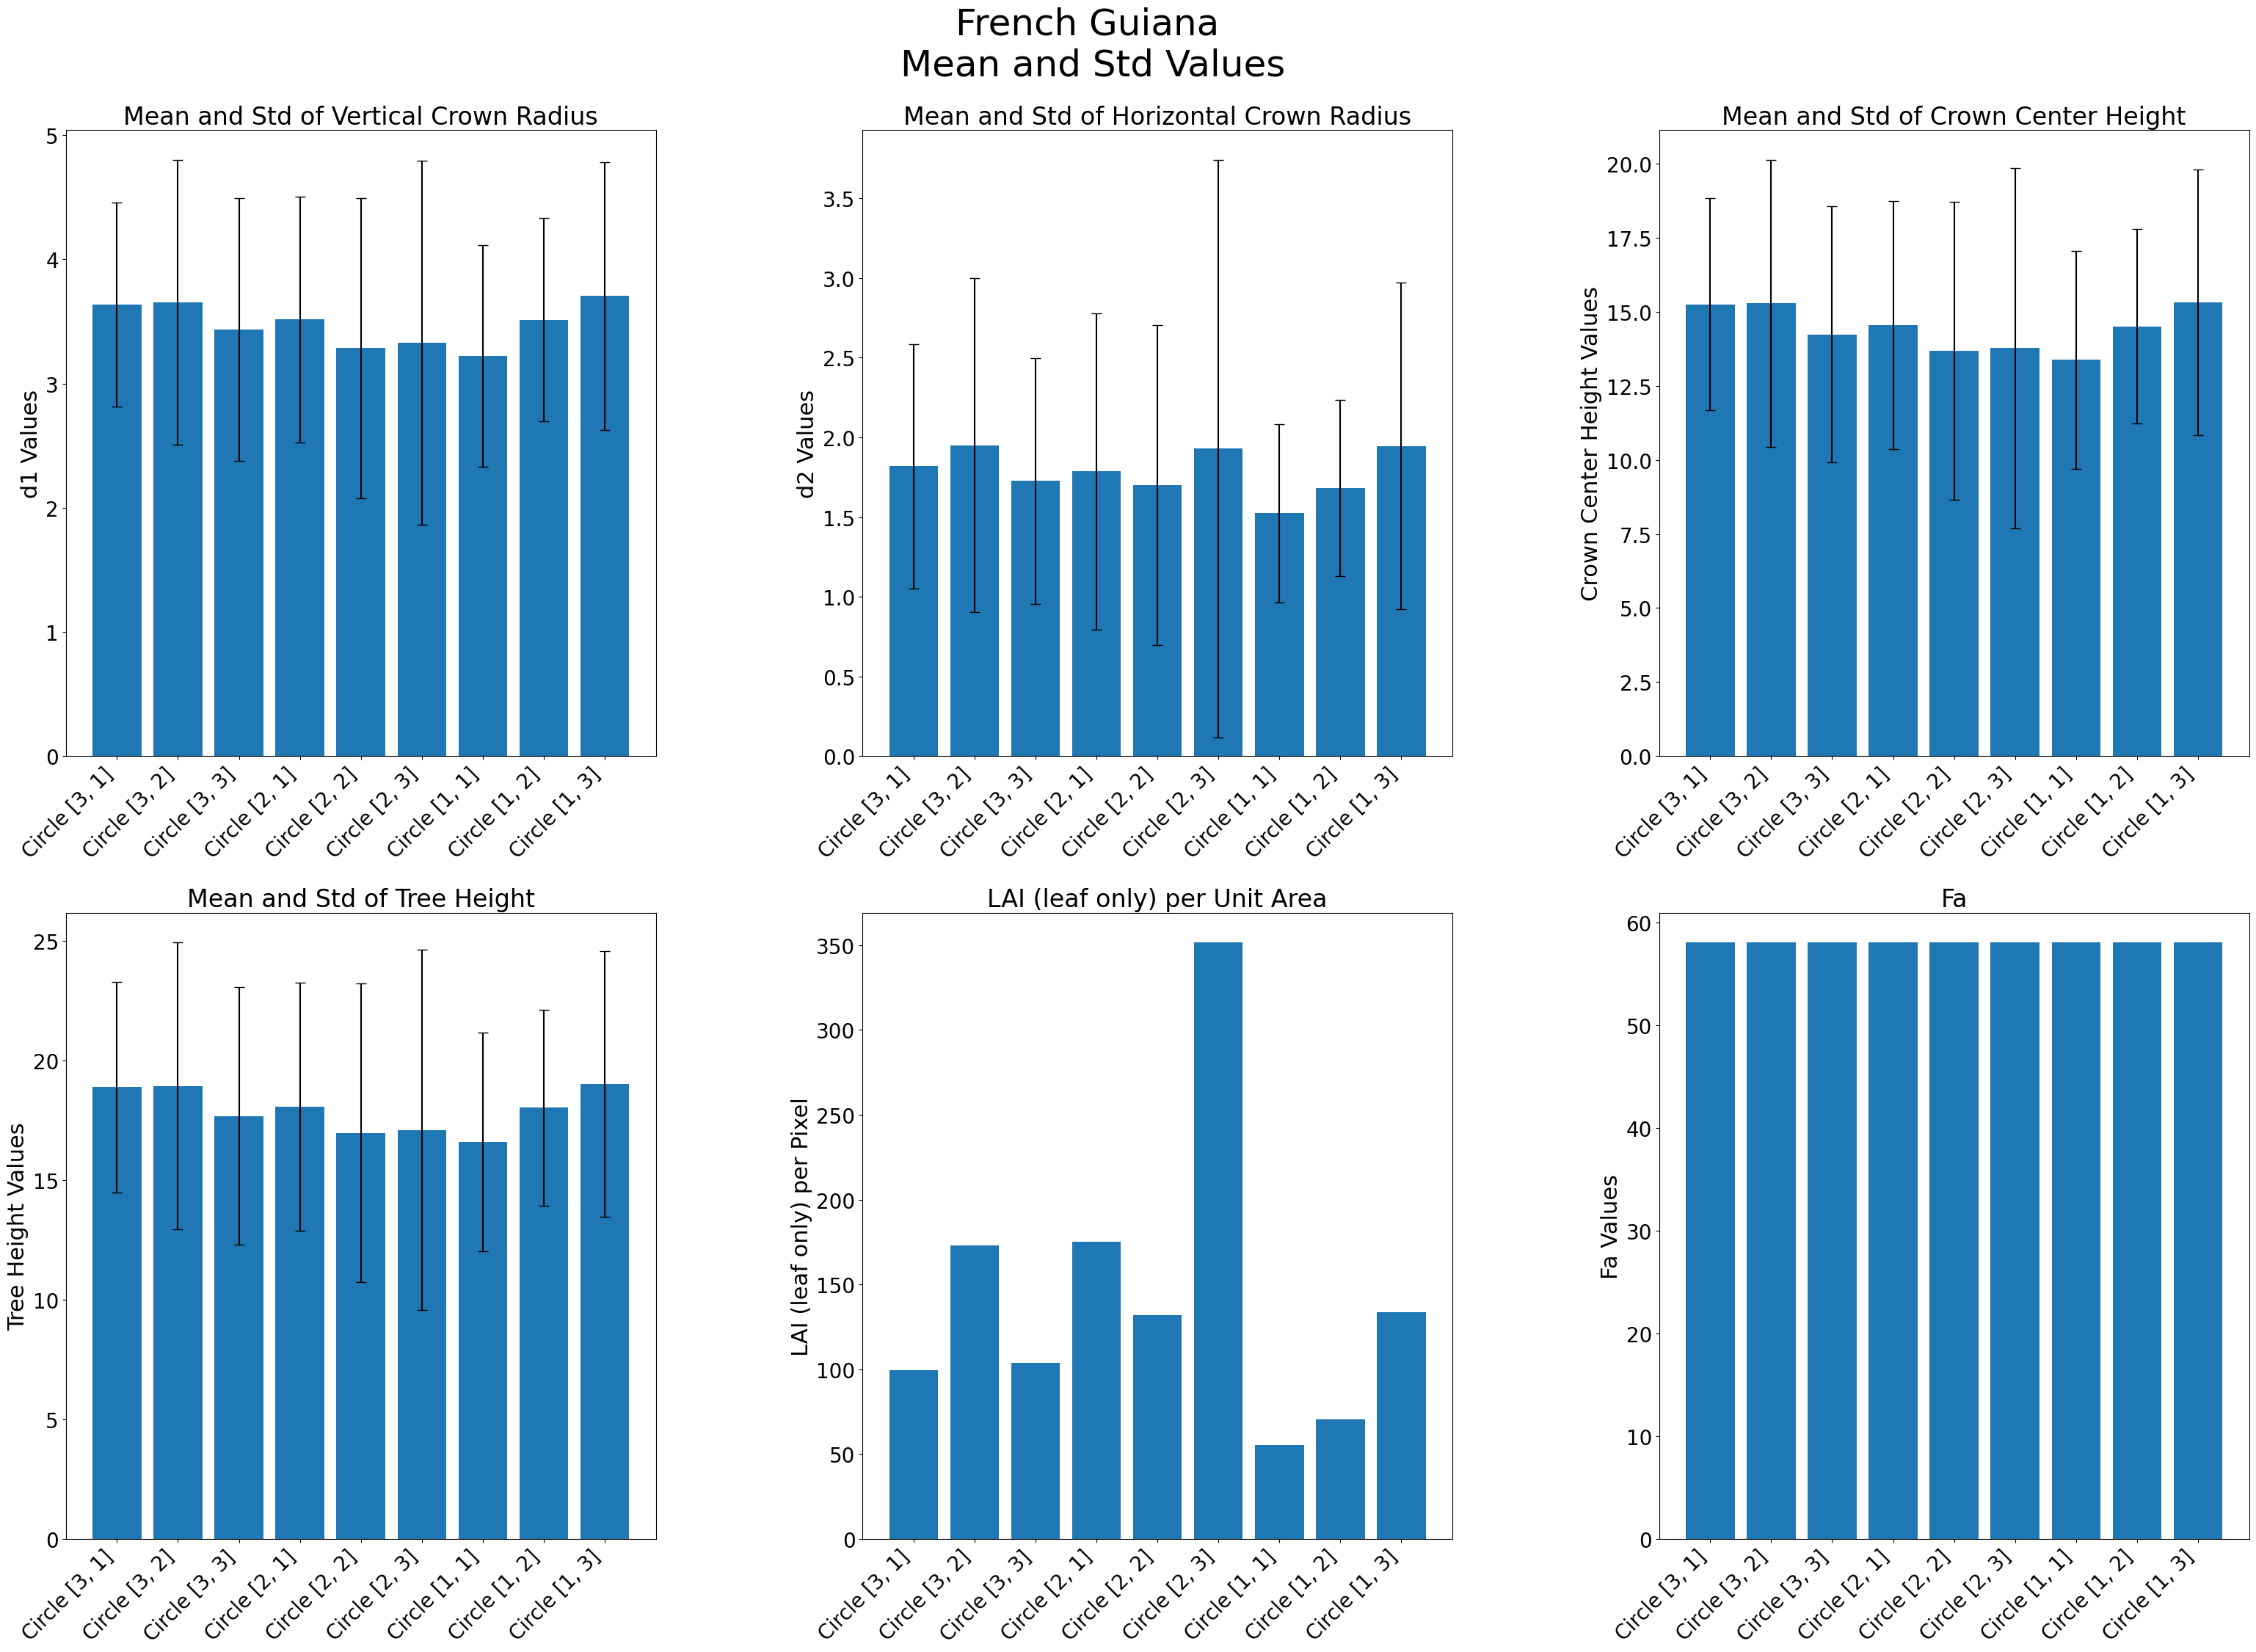

In [74]:
plot_mean_std_values(redwood_circle_indices, redwood_output_file_path, "redwood_mean_std_plots.png", "California Redwoods")
plot_mean_std_values(guiana_circle_indices, guiana_output_file_path, "guiana_mean_std_plots.png", "French Guiana")